In [27]:
import plotly.express as plx
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import scipy.stats as st

In [2]:
DATA_PATH = "../../data/input"

# Datasets

In [307]:
df_data = pd.read_csv(os.path.join(DATA_PATH, 'internship_data_matrix.csv'))
df_data.head(10)

,sample,FT-000,FT-001,FT-002,FT-003,FT-004,FT-005,FT-006,FT-007,FT-008,...,FT-242,FT-243,FT-244,FT-245,FT-246,FT-247,FT-248,FT-249,FT-250,FT-251
0,20241106-297-Blank1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,20241106-297-Blank2,0.000000,0.000000,0.000000,5.770641,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.534493,0.000000,0.000000,0.000000
2,20241106-297-Blank3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.469501,0.000000,0.000000,0.000000
3,20241106-297-Blank4,0.000000,5.497865,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,20241106-297-Blank5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,20241106-297-Blank6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,20241106-297-Diluted-QC1,1399.030351,2234.397837,2081.843031,3686.431339,7044.317405,40721.275363,20486.257971,1975.067689,6314.770037,...,65.429736,58.502252,641.535776,25.217837,0.000000,1587.339497,401.598503,26.081734,428.331105,63.870424
7,20241106-297-Diluted-QC2,1421.659554,2165.493736,2119.732010,3640.815214,7498.426630,41381.014453,21337.444716,2119.686893,6591.908929,...,75.803912,58.304733,757.692671,37.094034,0.000000,1762.655206,486.387939,32.405865,600.518429,0.000000
8,20241106-297-Diluted-QC3,1490.939447,2167.935040,559.809742,3716.471966,1839.149062,13089.714518,5693.504282,2069.800942,6716.728979,...,93.907909,90.051001,709.895566,63.108046,2.357303,2093.661027,470.599689,37.258958,481.160995,0.000000
9,20241106-297-Diluted-QC4,1546.950461,2057.856971,1770.333817,3231.122644,6340.197841,35954.845791,17957.282926,1898.047196,6358.421614,...,60.812886,110.968761,844.435996,74.010468,6.683485,1593.938447,565.760844,45.158254,605.402780,8.273432


In [4]:
df_feature_meta = pd.read_csv(os.path.join(DATA_PATH, 'internship_feature_metadata.csv'))
df_feature_meta.head()

,feature,mz,mz max,mz min,mz std,rt,rt end,rt max,rt min,rt start,rt std
0,FT-000,359.108768,359.130591,359.090122,0.010955,543.846374,561.270879,546.697803,539.941156,528.714227,1.683901
1,FT-001,357.109546,357.130018,357.091871,0.010668,543.839157,563.021530,546.948017,540.038924,528.530311,1.662290
2,FT-002,889.649931,889.702216,889.601547,0.025552,609.099742,627.717251,611.746501,606.426553,596.789046,1.324647
3,FT-003,355.111928,355.132772,355.093653,0.010508,543.995269,566.951285,547.164503,540.681882,526.943213,1.609071
4,FT-004,888.645365,888.696941,888.600202,0.026161,609.255652,632.996442,612.008732,606.778809,595.461688,1.254684


In [5]:
df_acq = pd.read_csv(os.path.join(DATA_PATH, 'internship_acquisition_list.csv'))
df_acq.head()

,sample,class,id,order,batch
0,20241106-297-Blank1,B,20241106-297-Blank1,1,1
1,20241106-297-Blank2,B,20241106-297-Blank2,2,1
2,20241106-297-Blank3,B,20241106-297-Blank3,3,1
3,20241106-297-Blank4,B,20241106-297-Blank4,102,1
4,20241106-297-Blank5,B,20241106-297-Blank5,103,1


In [6]:
df_ex_std = pd.read_csv(os.path.join(DATA_PATH, 'exogenous_standards.csv'))
df_ex_std

,compound_id,mz,Retention_time
0,GU4,886.40,610
1,GU5,1048.45,753
2,GU14,1253.96,1500
3,GU15,1334.99,1551


# First exploration

## Samples, batch, classes and run order

In [7]:
print(f"There are {df_acq['sample'].nunique()} samples")

There are 124 samples


In [8]:
print("Sample classes and frequency are :")
df_acq['class'].value_counts()

Sample classes and frequency are :


class
Dunn      27
LMU       26
French    26
QC        22
B         11
dQC       10
SS         2
Name: count, dtype: int64

In [293]:
print("There are only 2 batches with samples being eluted in batch 1 only")
df_acq[df_acq['class'] == 'QC'].sort_values(by='order')

There are only 2 batches with samples being eluted in batch 1 only


,sample,class,id,order,batch
91,20241106-297-QC1,QC,20241106-297-QC1,12,1
94,20241106-297-QC2,QC,20241106-297-QC2,13,1
95,20241106-297-QC3,QC,20241106-297-QC3,14,1
96,20241106-297-QC4,QC,20241106-297-QC4,26,1
97,20241106-297-QC5,QC,20241106-297-QC5,38,1
98,20241106-297-QC6,QC,20241106-297-QC6,50,1
99,20241106-297-QC7,QC,20241106-297-QC7,62,1
100,20241106-297-QC8,QC,20241106-297-QC8,74,1
101,20241106-297-QC9,QC,20241106-297-QC9,86,1
92,20241106-297-QC10,QC,20241106-297-QC10,100,1


In [304]:
def subbatch(x):
    if x['order'] <= 14 :
        return 0
    if x['order'] <= 26 :
        return 1
    if x['order'] <= 38 :
        return 2
    if x['order'] <= 50 :
        return 3
    if x['order'] <= 62 :
        return 4
    if x['order'] <= 74 :
        return 5
    if x['order'] <= 86 :
        return 6
    if x['order'] <= 101 :
        return 7
    else:
        return 8

df_acq['sub_batch'] = df_acq.apply(lambda x : subbatch(x), axis=1) 

## Samples and features
* How many features
* How many samples
* NaN values ?
* Scale, distribution, possible outliers

In [10]:
print(f"{df_data.shape[1] -1} features were detected")

252 features were detected


In [11]:
print("There are no missing entries in the dataset")
df_data[df_data.isna().any(axis=1)]

There are no missing entries in the dataset


,sample,FT-000,FT-001,FT-002,FT-003,FT-004,FT-005,FT-006,FT-007,FT-008,...,FT-242,FT-243,FT-244,FT-245,FT-246,FT-247,FT-248,FT-249,FT-250,FT-251


In [12]:
summary = df_data.drop('sample', axis=1).describe().T.reset_index(names='feature')
summary.sort_values(by='50%')

,feature,count,mean,std,min,25%,50%,75%,max
251,FT-251,124.0,18.892990,30.104685,0.0,0.000000,0.000000,28.720251,106.548827
174,FT-174,124.0,36.488393,53.545819,0.0,0.000000,7.605016,68.722024,284.512362
172,FT-172,124.0,72.908623,119.691484,0.0,0.000000,10.582890,128.296711,621.157232
215,FT-215,124.0,27.909818,19.733551,0.0,11.322193,27.754493,42.844679,99.942765
79,FT-079,124.0,60.205106,88.367856,0.0,12.739702,52.632901,81.488766,848.168217
...,...,...,...,...,...,...,...,...,...
10,FT-010,124.0,23436.979986,13059.588068,0.0,22642.203530,28972.029997,32108.694714,37878.353716
142,FT-142,124.0,23940.565772,13595.312216,0.0,24197.415652,30412.315270,32845.632119,40967.389005
5,FT-005,124.0,25167.289931,15402.773802,0.0,15076.027246,30642.503795,35819.855961,49640.208086
105,FT-105,124.0,32207.198677,18320.449383,0.0,33218.057924,39908.131176,43322.703214,54555.522451


# Analysis

1.a - What is the features distribution across m/z and RT ?

The features considered are the chromatographic peaks detected for a given retention time range at a given mass / charge ratio range. A feature value is the peak intensity integrated over the considered time range.
Assuming that features have already been found optimally, 252 features have been detected.

In [308]:
df_data = df_data.merge(df_acq[['sample', 'class', 'order', 'batch', 'sub_batch']], on='sample')
df_data_melt = df_data.melt(id_vars=['sample', 'class', 'order', 'batch', 'sub_batch'],value_name='intensity', var_name='feature')
df_data_melt['feature_number'] = df_data_melt['feature'].apply(lambda s : int(s.split('-')[1]))

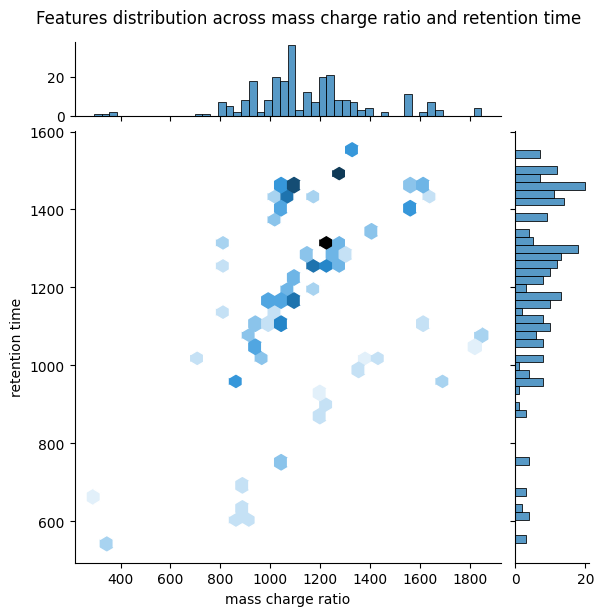

In [15]:
plot =sns.jointplot(x=df_feature_meta.rename(columns={'mz': 'mass charge ratio'})['mass charge ratio'],\
                    y = df_feature_meta.rename(columns={'rt': 'retention time'})['retention time'], kind='hex',\
                    marginal_kws=dict(bins=50), marginal_ticks=True, joint_kws=dict(gridsize=30))
plt.suptitle('Features distribution across mass charge ratio and retention time', y=1.02)
plt.show()

In [22]:
df_feature_meta[['mz', 'rt']].describe(percentiles = [.1,.25,.5,.75,.9])

,mz,rt
count,252.000000,252.000000
mean,1148.883784,1225.810779
std,242.652646,223.363360
min,293.183141,543.839157
10%,887.747036,963.102571
25%,1026.193175,1107.186071
50%,1089.360559,1257.883210
75%,1253.561990,1419.468573
90%,1558.997340,1471.395049
max,1846.271291,1551.421331


80% of all features have a mass to charge ratio between 887.75 and 1559. 80% of all features have a retention time between 963.10 and 1471.4. 

This can be easily visualized on the joint density plot above.

1.b - How is the feature distribution across classes ?

Confidence intervals for feature intensity across classes spread across 3 orders of magnitude

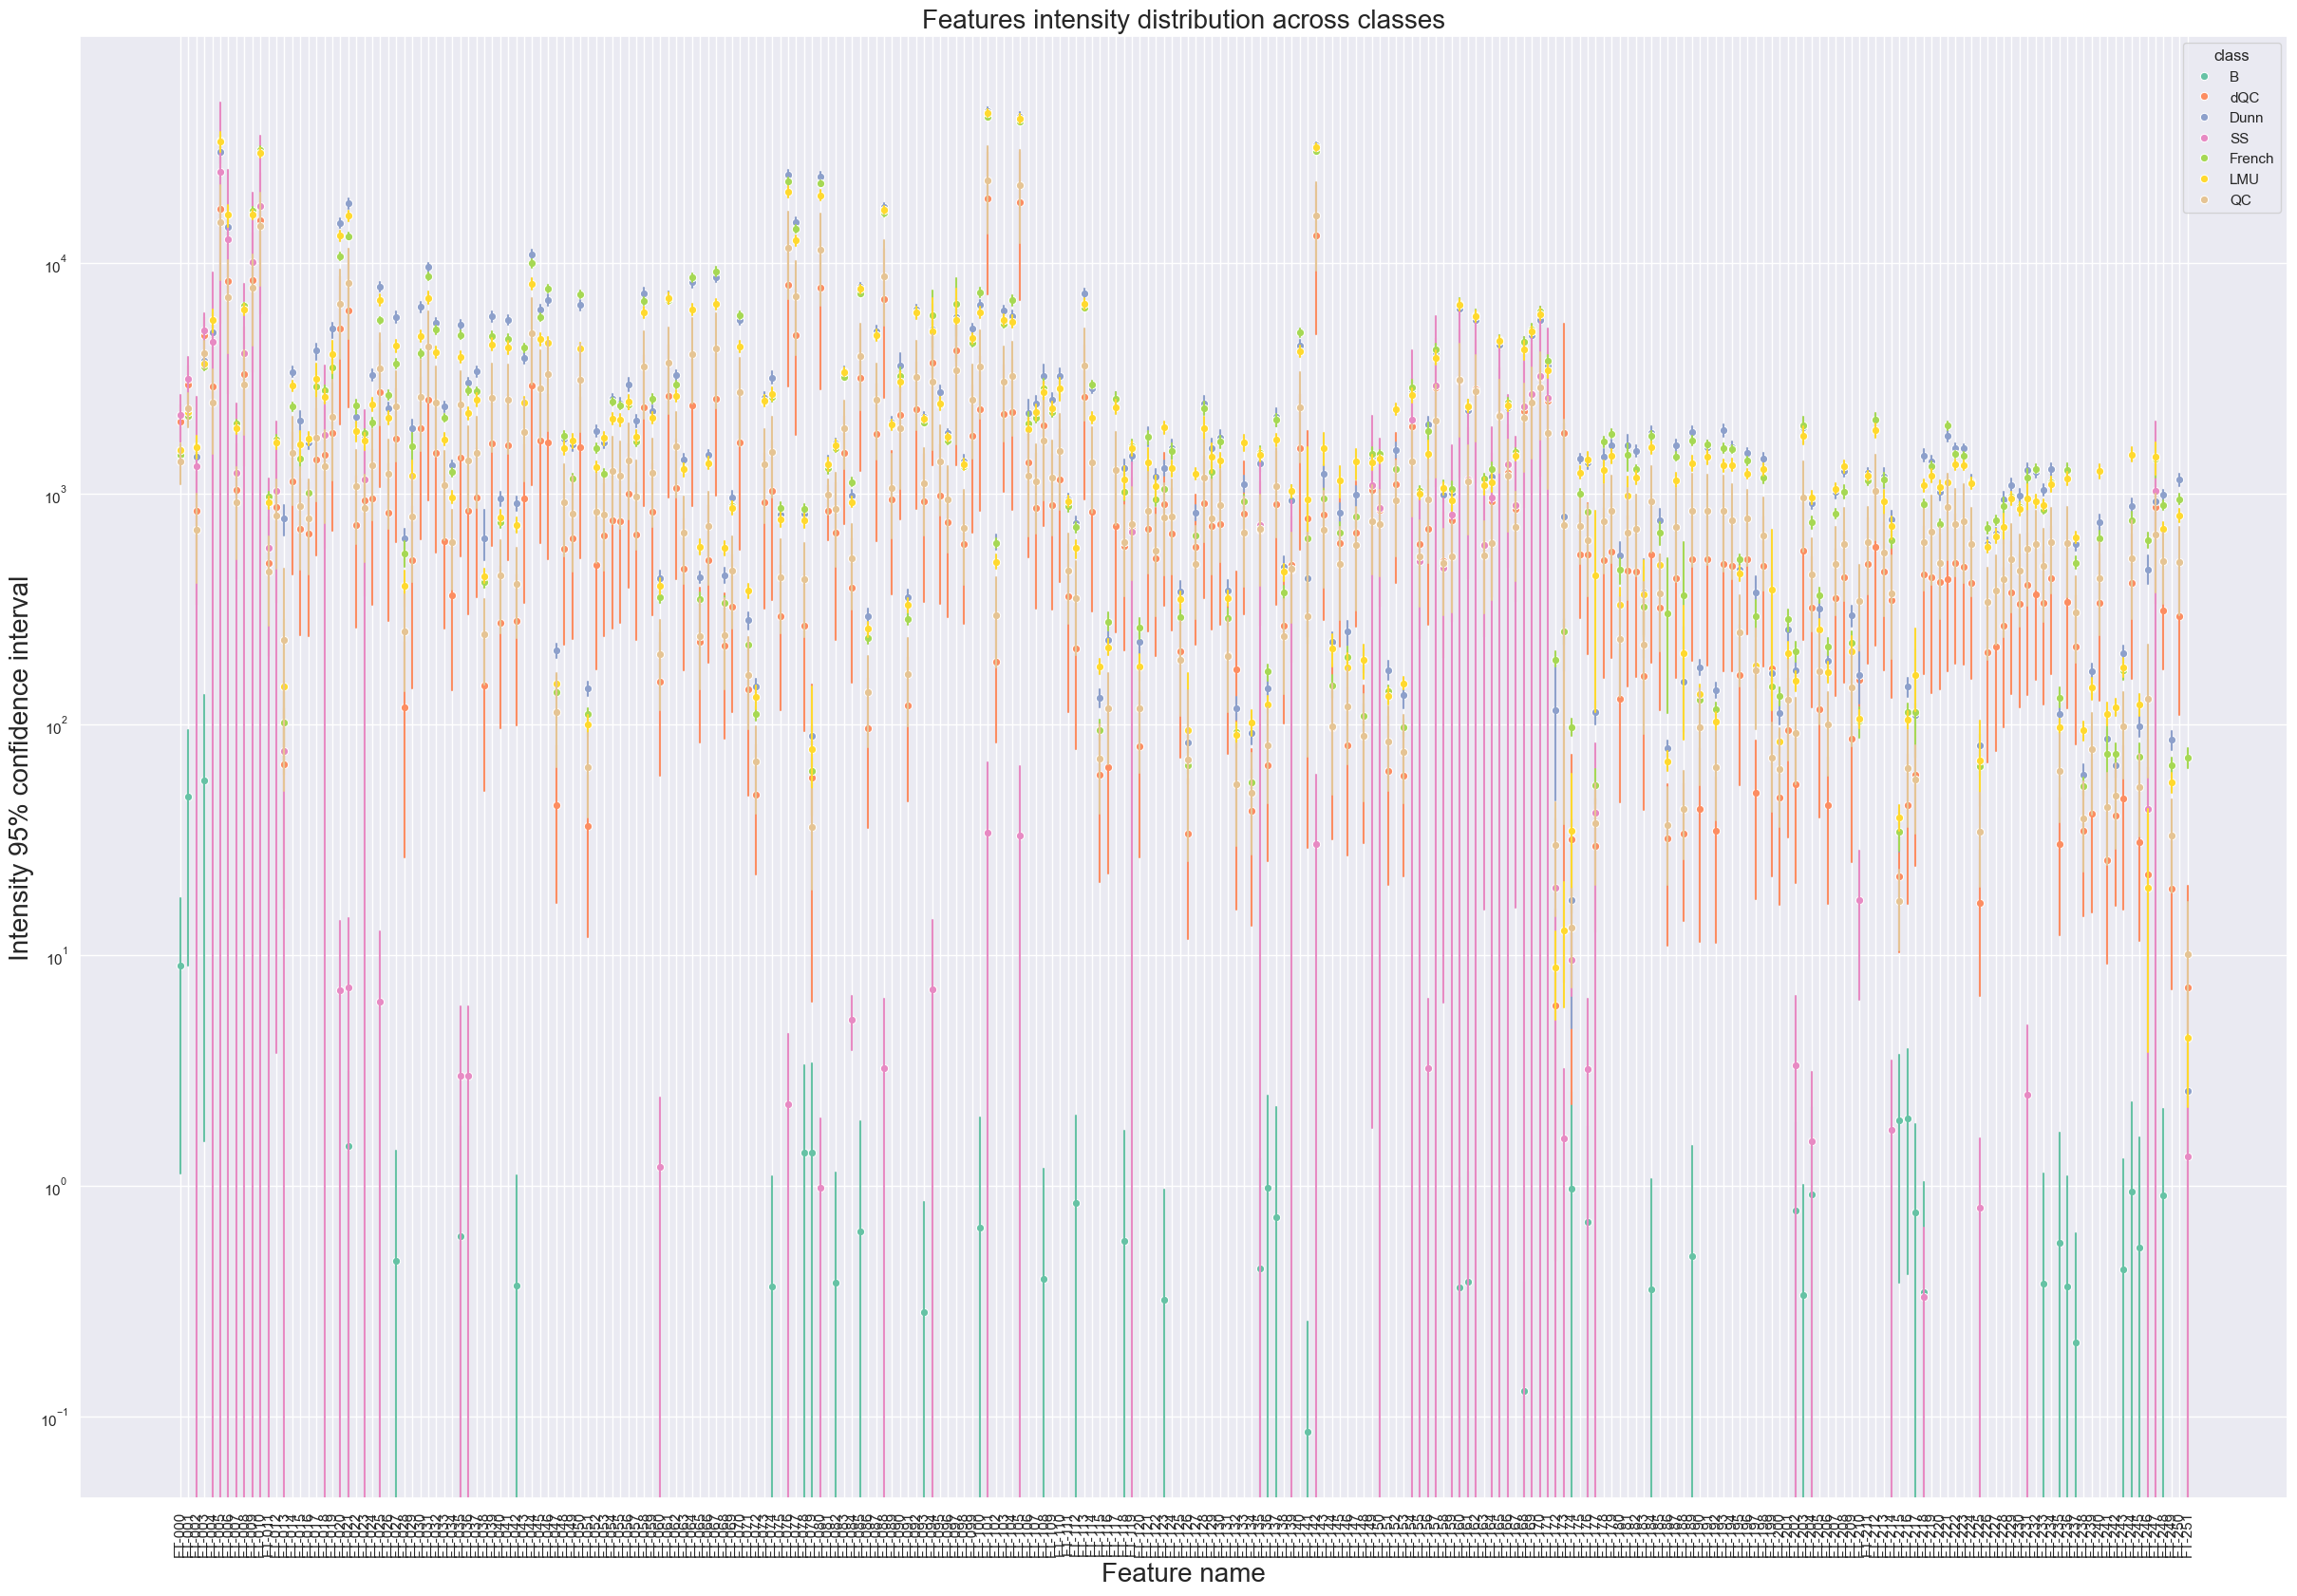

In [182]:
sns.set(rc = {'figure.figsize':(30, 20)})
fig = sns.lineplot(data = df_data_melt,
                   x='feature', y='intensity',\
                   marker='o', linestyle='-', err_style='bars', palette = 'Set2', hue='class')
fig.axes.set_title('Features intensity distribution across classes',fontsize=20)
fig.set_xlabel("Feature name",fontsize=20)
fig.set_ylabel("Intensity 95% confidence interval",fontsize=20)
fig.set(yscale='log')
plt.xticks(rotation=90)
plt.show()

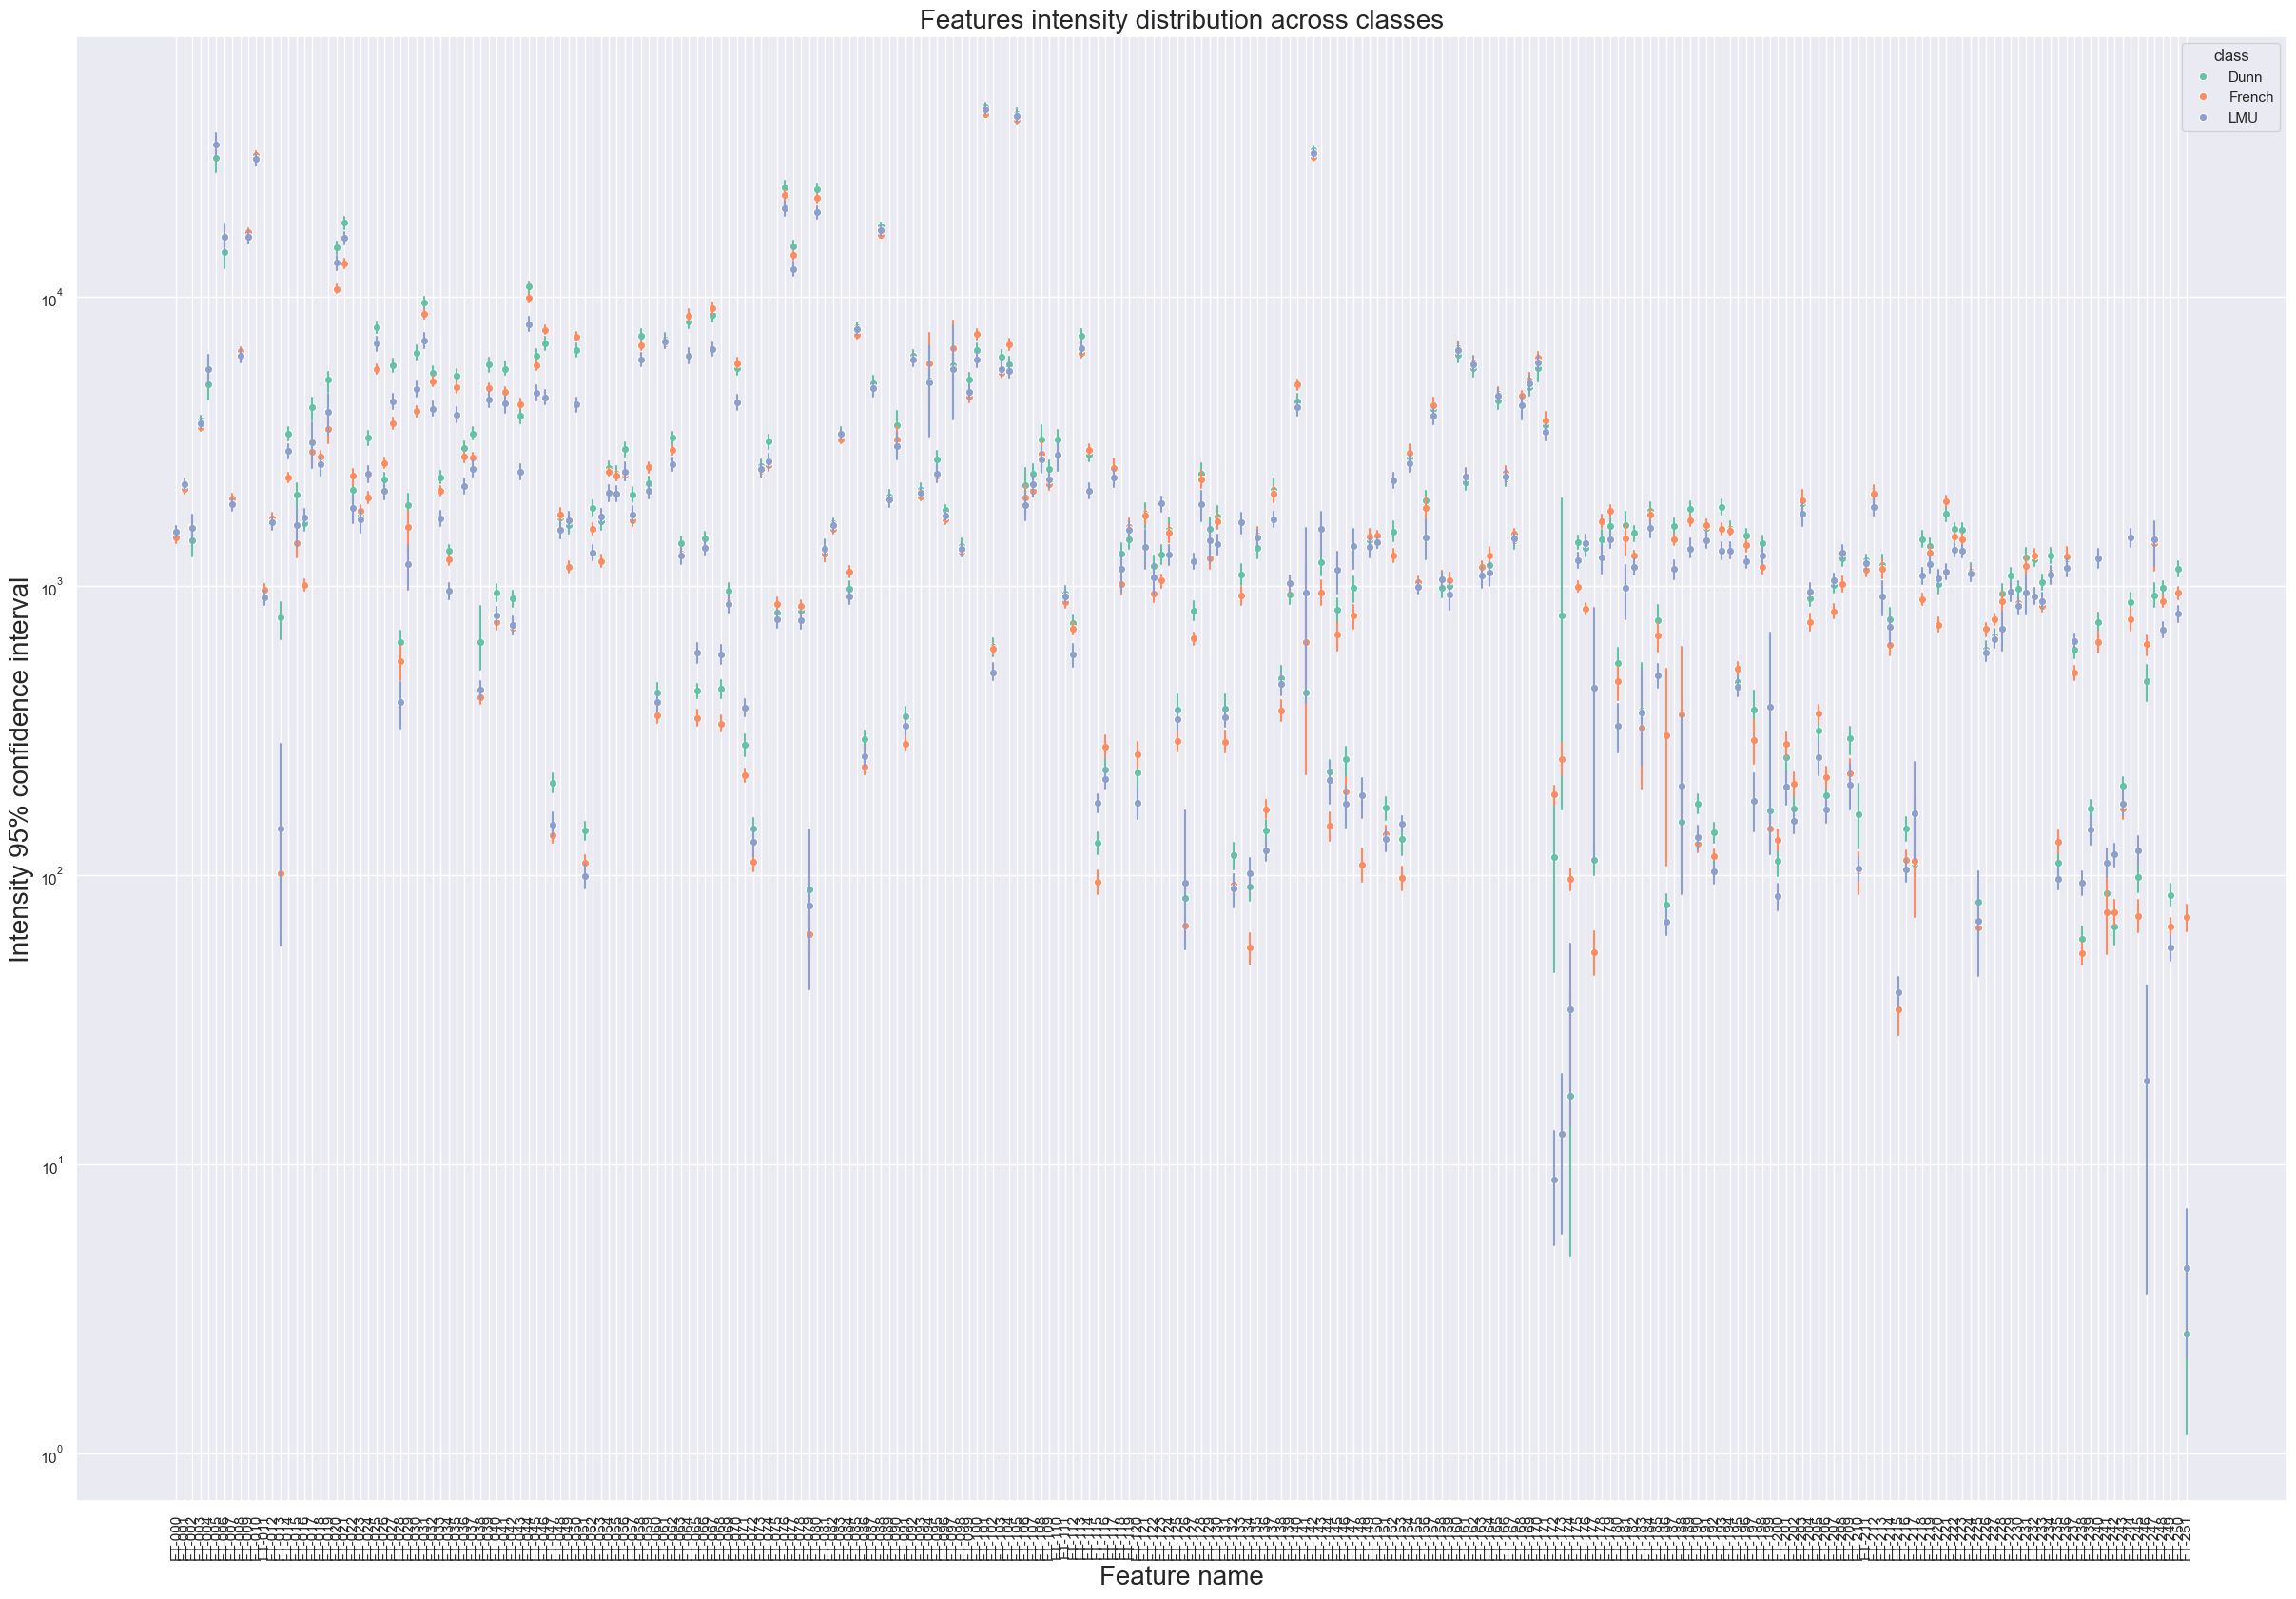

In [184]:
sns.set(rc = {'figure.figsize':(30, 20)})
fig = sns.lineplot(data = df_data_melt[df_data_melt['class'].isin(['Dunn', 'French', 'LMU'])],
                   x='feature', y='intensity',\
                   marker='o', linestyle='', err_style='bars', palette = 'Set2', hue='class')
fig.axes.set_title('Features intensity distribution across classes',fontsize=20)
fig.set_xlabel("Feature name",fontsize=20)
fig.set_ylabel("Intensity 95% confidence interval",fontsize=20)
fig.set(yscale='log')
plt.xticks(rotation=90)
plt.show()

Confidence intervals for feature intensity distribution are distinct across the three sample classes for some features.

Most of features intensity range between 100 and 10'000.

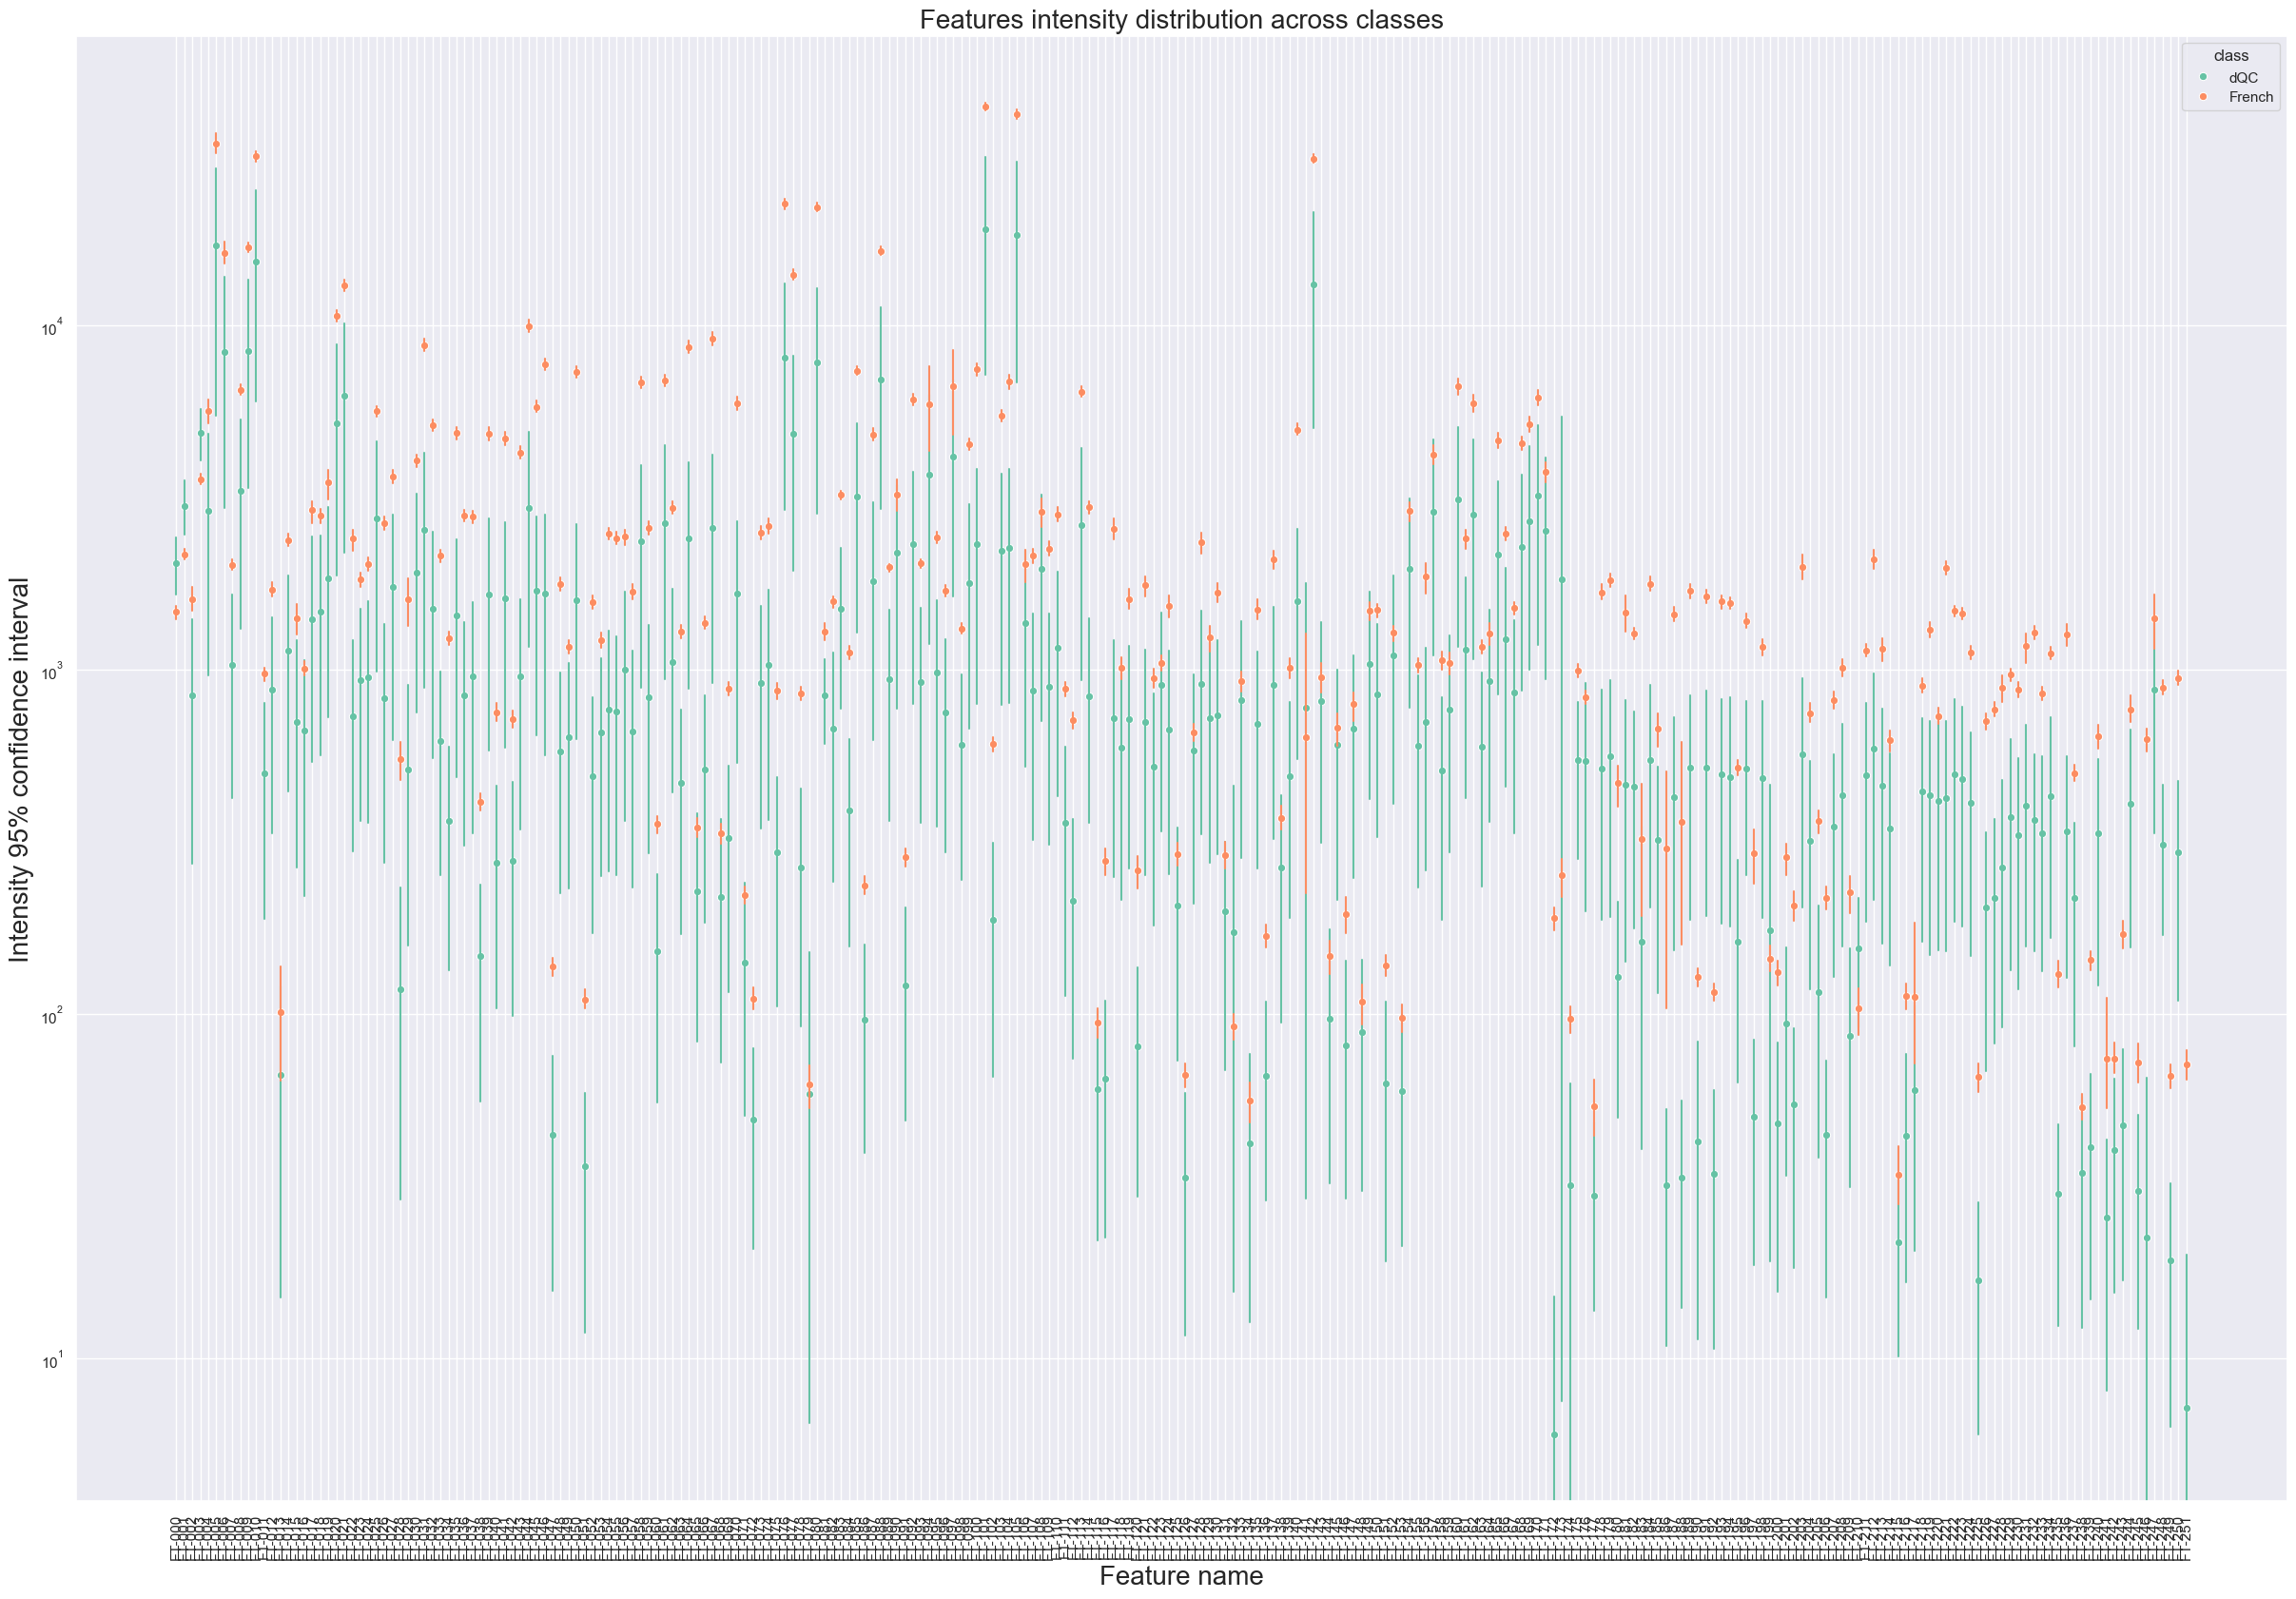

In [192]:
sns.set(rc = {'figure.figsize':(30, 20)})
fig = sns.lineplot(data = df_data_melt[df_data_melt['class'].isin(['French', 'dQC'])],
                   x='feature', y='intensity',\
                   marker='o', linestyle='', err_style='bars', palette = 'Set2', hue='class')
fig.axes.set_title('Features intensity distribution across classes',fontsize=20)
fig.set_xlabel("Feature name",fontsize=20)
fig.set_ylabel("Intensity 95% confidence interval",fontsize=20)
fig.set(yscale='log')
plt.xticks(rotation=90)
plt.show()

2.a - Contamination

Contamination can be assessed using blank samples. 
First of all, if blank samples exhibit significant peaks consistently across batches, then it might highlight a contaminant.
To check peak significant, we will compare blank samples peak intensity between batches. 

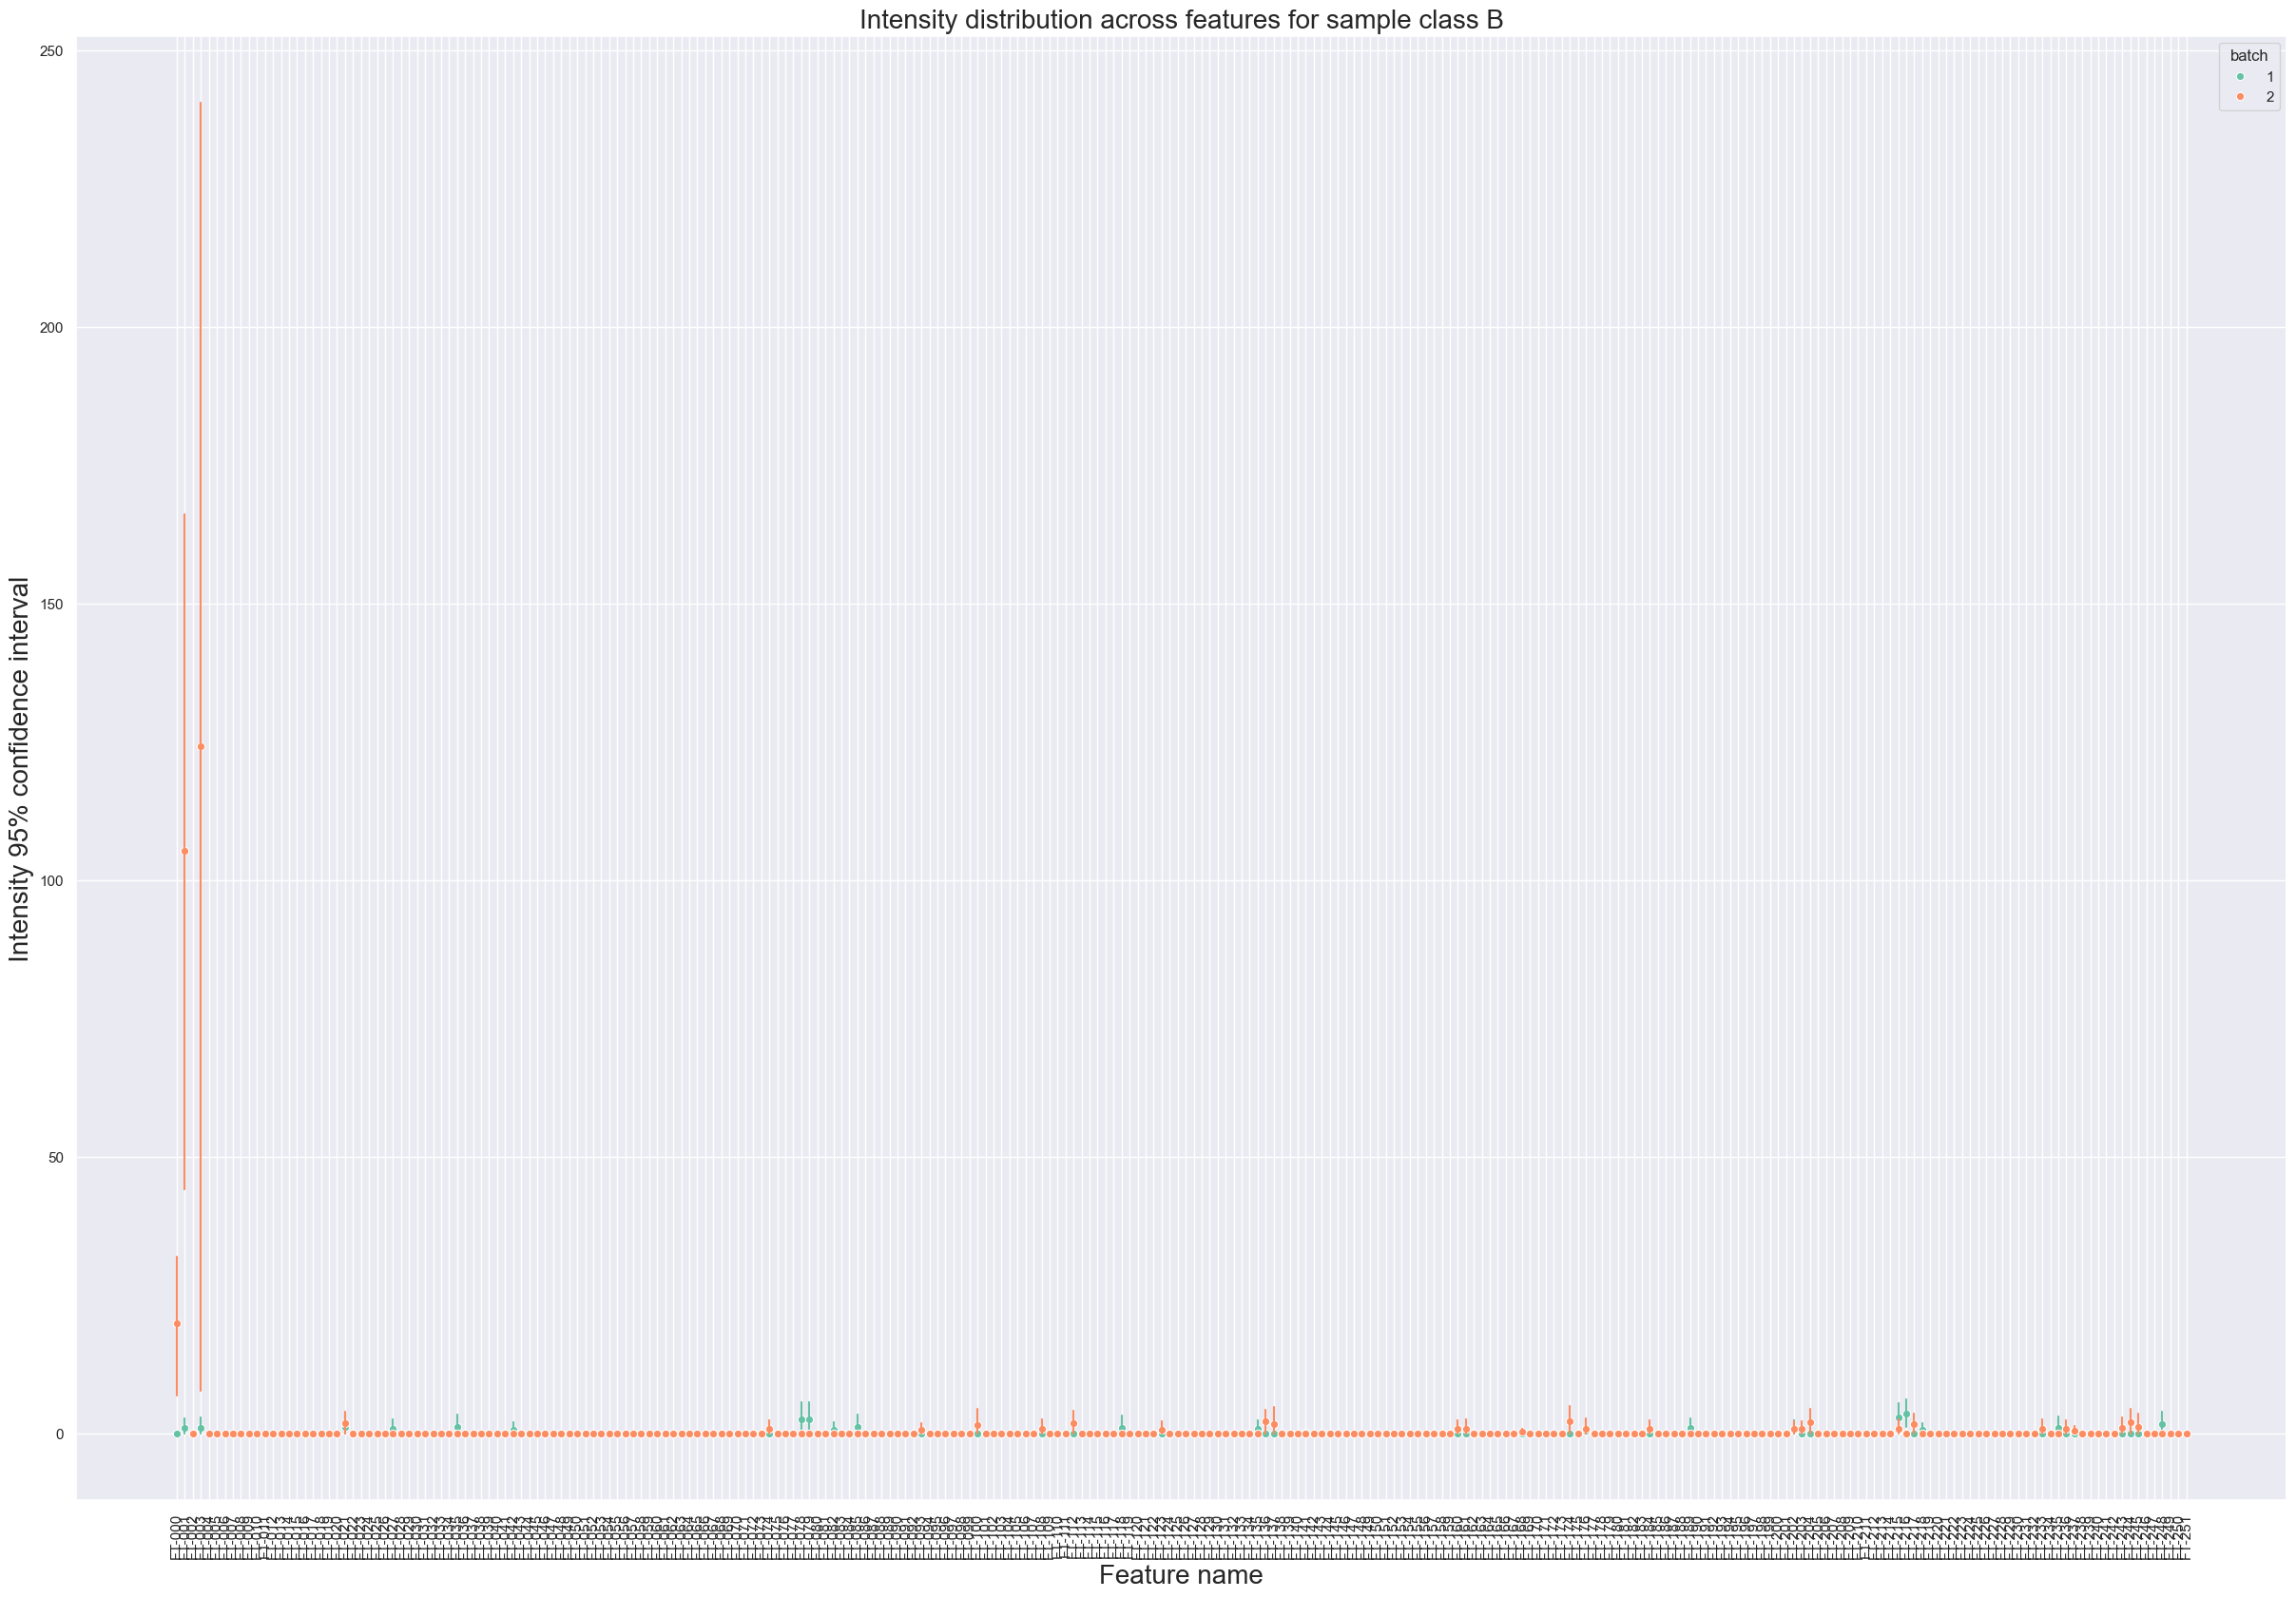

In [232]:
# Class B 
sns.set(rc = {'figure.figsize':(30, 20)})
fig = sns.lineplot(data = df_data_melt.loc[(df_data_melt['Feature number'] >= 0) & (df_data_melt['Feature number'] < 260 ) & df_data_melt['class'].isin(['B'])],\
                   x='Feature', y='Intensity',hue='batch',\
                   marker='o', linestyle='', err_style='bars', palette = 'Set2')
fig.axes.set_title('Intensity distribution across features for sample class B',fontsize=20)
fig.set_xlabel("Feature name",fontsize=20)
fig.set_ylabel("Intensity 95% confidence interval",fontsize=20)
#fig.set(yscale='log')
plt.xticks(rotation=90)
plt.show()

Peak heights for features 0, 1 and 3 in batch 2 are significantly greater than for batch 1. It may highlight a contaminant. Otherwise, batch 1 peaks heights are negligible compared to actual samples peaks heights. So we can assess that there is no contamination for batch 1. 

We can also consider that intensities below 50 are noise.

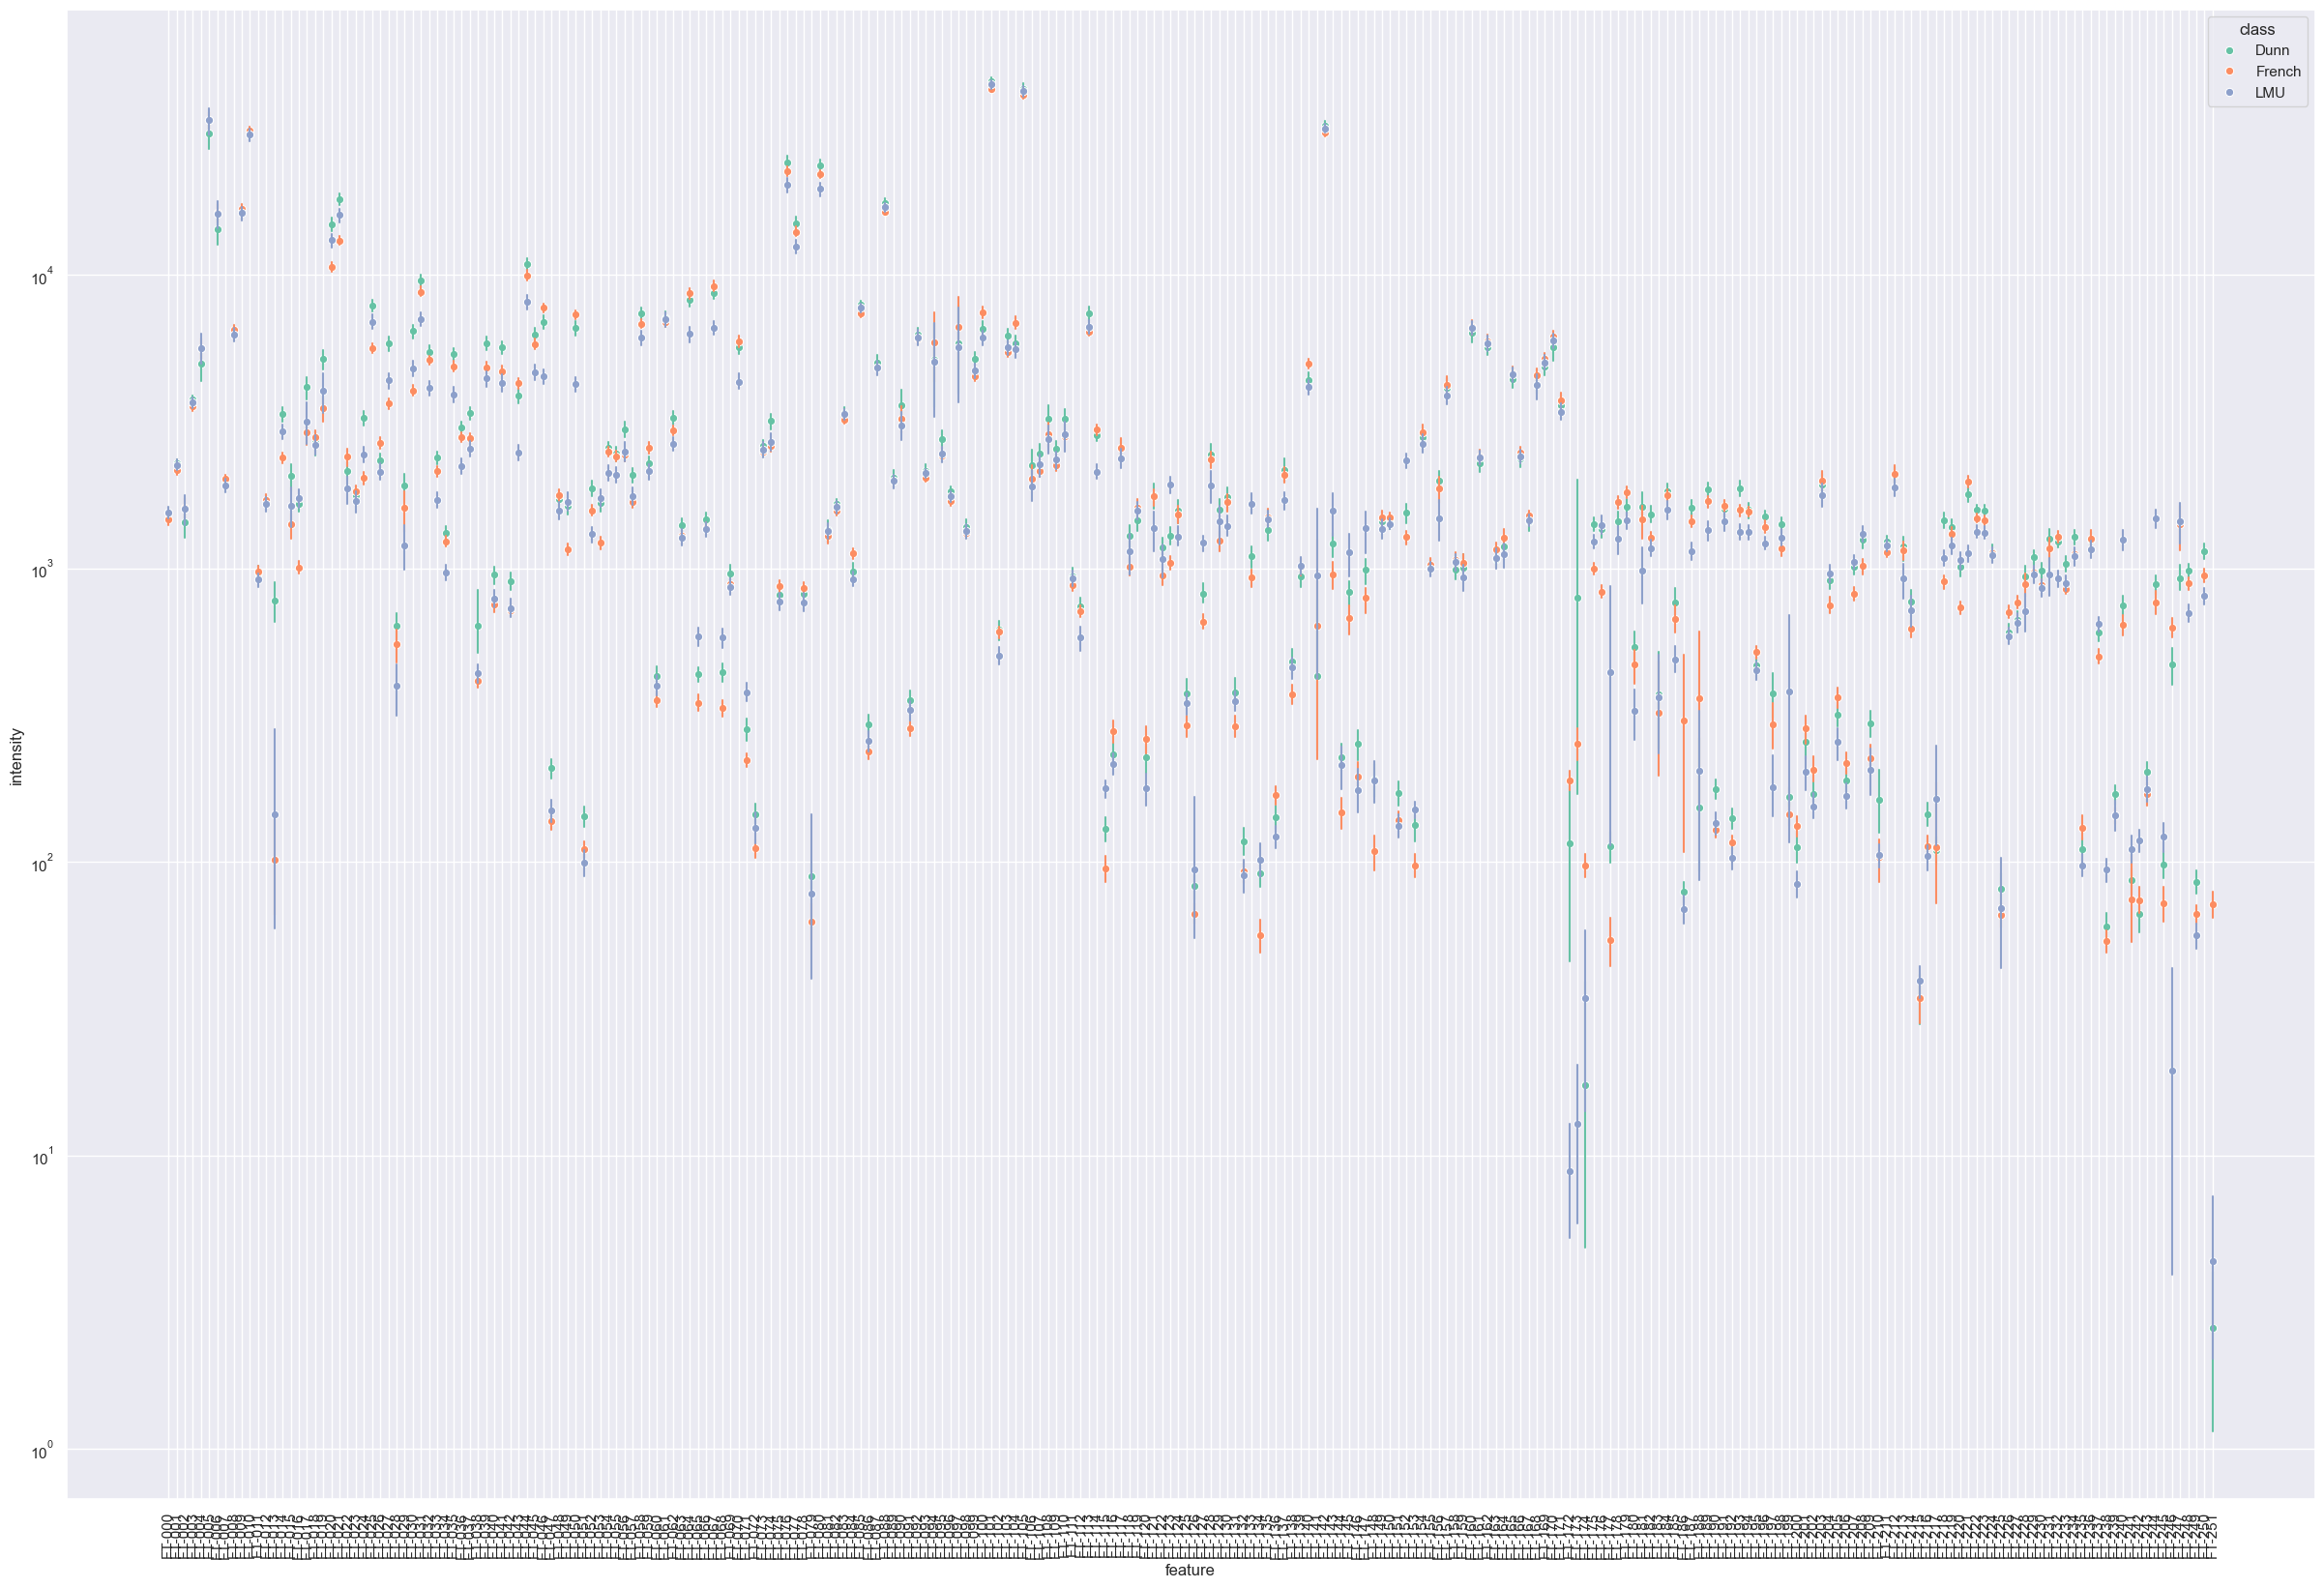

In [181]:
sns.set(rc = {'figure.figsize':(30, 20)})
fig = sns.lineplot(data = df_data_melt.loc[df_data_melt['class'].isin(['Dunn', 'LMU', 'French'])],\
                   x='feature', y='intensity',hue='class',\
                   marker='o', linestyle='', err_style='bars', palette = 'Set2')
fig.set(yscale='log')
plt.xticks(rotation=90)
plt.show()

3.a - Compute CVs for features class-wise and globally

In [33]:
cv_classwise = df_data_melt[['class', 'feature', 'intensity']].groupby(['class', 'feature']).agg(lambda x : 0 if x.mean() <= 10E-3 else x.std() / x.mean() * 100).reset_index()\
                            .rename(columns={'intensity' : 'CV%'})\
                            .sort_values(by=['class','CV%'])
cv_classwise

,class,feature,CV%
2,B,FT-002,0.000000
4,B,FT-004,0.000000
5,B,FT-005,0.000000
6,B,FT-006,0.000000
7,B,FT-007,0.000000
...,...,...,...
1711,dQC,FT-199,255.217931
1644,dQC,FT-132,255.927394
1763,dQC,FT-251,278.277150
1758,dQC,FT-246,302.208407


3.b - Are the standards detected consistently across the experiment ?

As we have only two SS samples, we should first select features which exhibit a high intensity and we compare these features to the exogenous standards.
Then, to check consistency of standards detection in SS samples, we should filter features which exhibit a CV smaller than 40% and compare them to the exogenous standards features. 

In [43]:
print("Exogenous standard we want to detect")
df_ex_std

Exogenous standard we want to detect


,compound_id,mz,Retention_time
0,GU4,886.40,610
1,GU5,1048.45,753
2,GU14,1253.96,1500
3,GU15,1334.99,1551


In [100]:
closest_feats = dict()
for i, c in df_ex_std.iterrows():
    df_feature_meta['c_dist'] = np.sqrt((df_feature_meta['mz'] - c['mz'])**2 + (df_feature_meta['rt'] - c['Retention_time'])**2 )
    closest_feats[c['compound_id']] = df_feature_meta['feature'].iloc[df_feature_meta['c_dist'].idxmin()]

print("These are the closest features to the exogenous compounds, in term of mz and rt")
print(closest_feats)

These are the closest features to the exogenous compounds, in term of mz and rt
{'GU4': 'FT-005', 'GU5': 'FT-010', 'GU14': 'FT-162', 'GU15': 'FT-169'}


In [41]:
high_intensity_feats = df_data_melt.loc[(df_data_melt['class'] == 'SS') & (df_data_melt['intensity'] >= 1E3)]['feature']
high_intensity_feats_meta = df_feature_meta[(df_feature_meta['feature'].isin(high_intensity_feats))]

In [98]:
closest_feats

{'GU4': 'FT-005', 'GU5': 'FT-010', 'GU14': 'FT-162', 'GU15': 'FT-169'}

In [99]:
high_intensity_feats_meta[high_intensity_feats_meta['feature'].isin(closest_feats.values())]

,feature,mz,mz max,mz min,mz std,rt,rt end,rt max,rt min,rt start,rt std
5,FT-005,886.632460,886.683375,886.580667,0.026029,609.461289,638.067164,612.067644,606.711878,593.375215,1.287131
10,FT-010,1048.724800,1048.785954,1048.669876,0.030825,753.824614,789.134640,756.436012,751.049814,736.919631,1.286855
162,FT-162,1254.277029,1254.349588,1254.211046,0.036267,1499.404825,1520.664302,1501.897377,1496.650283,1481.805204,1.265325
169,FT-169,1335.323637,1335.400775,1335.251201,0.039461,1551.257112,1571.193499,1553.935840,1548.495745,1537.579330,1.327435


Features 5, 10, 162 and 169 are closest in terms of euclidean distance to exogenous compounds of interest. These features have been successfully detected with a high intensity for the first SS sample, therefore standards have been successfully detected in the first phase of the experiment.


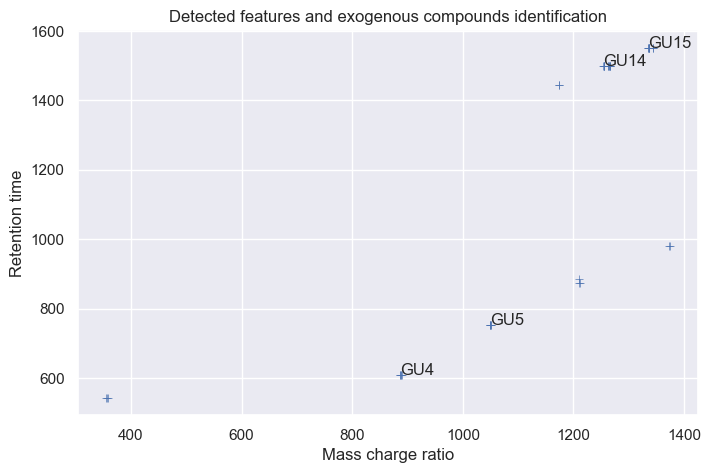

In [76]:
sns.set(rc = {'figure.figsize':(8, 5)})
df_plot = high_intensity_feats_meta[['feature', 'mz', 'rt']]
df_plot = pd.concat([df_plot, df_ex_std.rename(columns={'compound_id':'feature', 'Retention_time':'rt'})])
fig = sns.scatterplot(df_plot, x='mz', y='rt', marker='+')
plt.title('Detected features and exogenous compounds identification')
# Set x-axis label
plt.xlabel('Mass charge ratio')
# Set y-axis label
plt.ylabel('Retention time')

for i, point in df_plot.iterrows():
    if not 'FT' in point['feature']:
        fig.text(point['mz']+.02, point['rt'], str(point['feature']))

In [35]:
cv_classwise[(cv_classwise['class'] == 'SS') & (cv_classwise['CV%'] <= 50) & (cv_classwise['CV%'] > 0)]

,class,feature,CV%
1263,SS,FT-003,26.345770
1260,SS,FT-000,32.086244
1261,SS,FT-001,34.879011
1344,SS,FT-084,37.586018
1434,SS,FT-174,42.897523


However, we also notice that SS samples exhibit a strong intensity for features 0, 1 and 3, similarly to blank samples, and that exogenous standards are not consistently detected across the 2 batches.

4.a - How is the distribution of intensities across classes ?


In [176]:
df_data_melt[['class', 'intensity']].groupby('class').agg(lambda x : np.count_nonzero(x) / x.size * 100)

,intensity
class,
B,2.633478
Dunn,99.368019
French,99.801587
LMU,98.565324
QC,64.375902
SS,15.674603
dQC,63.968254


I observe that more than 2.63 % recorded features intensity for blank samples are non-zero, which is expected from previous plots. This percentage amounts to 15.67% for SS samples.

[Text(0.5, 1.0, 'Intensity distribution across classes and features')]

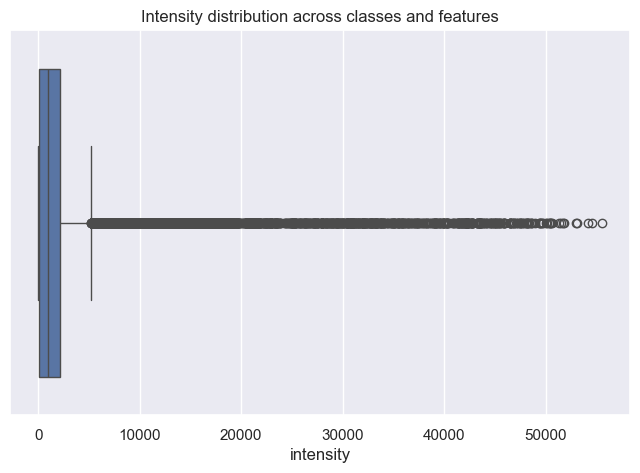

In [198]:
sns.set(rc = {'figure.figsize':(8, 5)})
sns.boxplot(data = df_data_melt, x='intensity', log_scale=False).set(title='Intensity distribution across classes and features')

Intensity distribution is heavy-tailed. Aggregating across classes isn't meaningful since classes have different number of samples and exhibit different intensity distribution.

In [178]:
df_data_melt['intensity'].describe([i/10 for i in range(1,10)])

count    31248.000000
mean      2371.775642
std       5327.356936
min          0.000000
10%          0.000000
20%          2.622847
30%        112.498079
40%        378.158281
50%        923.191831
60%       1310.858251
70%       1769.408168
80%       2691.626942
90%       5550.773544
max      55518.049184
Name: intensity, dtype: float64

<Axes: xlabel='intensity', ylabel='Count'>

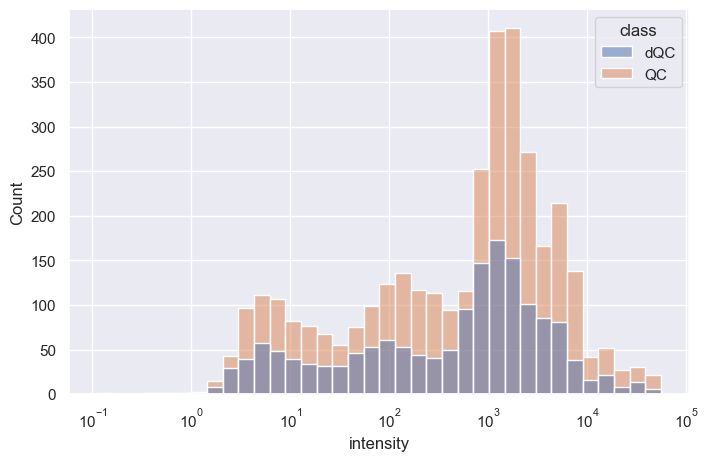

In [207]:
sns.histplot(data = df_data_melt[df_data_melt['class'].isin(['QC', 'dQC'])], x='intensity', log_scale=True, hue='class')#, multiple='stack', hue_order=['Dunn', 'French', 'LMU', 'B', 'SS', 'dQC', 'QC', ])

In [171]:
df_data_melt[['class', 'intensity']].groupby('class').describe([.05,.1,.25,.5, .75, .9, .95])

intensity                                                        \
           count         mean          std  min         5%         10%   
class                                                                    
B         2772.0     0.561195     9.600400  0.0   0.000000    0.000000   
Dunn      6804.0  3237.289219  6050.073897  0.0  86.573453  138.397656   
French    6552.0  3073.459797  5826.819180  0.0  74.146142  120.273310   
LMU       6552.0  2965.435838  5859.507596  0.0  60.277886  108.597083   
QC        5544.0  1600.374339  4482.442246  0.0   0.000000    0.000000   
SS         504.0   504.806076  3215.835311  0.0   0.000000    0.000000   
dQC       2520.0  1345.806346  3982.918937  0.0   0.000000    0.000000   

                                                                         \
               25%          50%          75%          90%           95%   
class                                                                     
B         0.000000     0.000000     0.000000     0.000000      0.000000   
Dunn    584.186144  1440.412919  3042.755916  6819.306322  12827.507164   
French  531.119369  1341.509997  2762.124370  6731.763669  11392.762759   
LMU     489.703561  1335.555763  2639.723235  6011.759908  11474.974684   
QC        0.000000    68.441776  1447.972181  4034.473192   6632.155691   
SS        0.000000     0.000000     0.000000    15.328973   2277.259525   
dQC       0.000000    48.259990  1193.429614  3278.703070   5423.425630   

                      
                 max  
class                 
B         300.318172  
Dunn    54183.925910  
French  49467.793257  
LMU     54555.522451  
QC      55518.049184  
SS      49640.208086  
dQC     46716.664373

More than 90% of recorded intensities for Dunn, French and LMU are above 100.

In [115]:
test1 = st.ks_2samp(df_data_melt[df_data_melt['class'] == 'LMU']['intensity'],\
                  df_data_melt[df_data_melt['class'] == 'French']['intensity'])
test2 = st.ks_2samp(df_data_melt[df_data_melt['class'] == 'LMU']['intensity'],\
                  df_data_melt[df_data_melt['class'] == 'Dunn']['intensity'])
test3 = st.ks_2samp(df_data_melt[df_data_melt['class'] == 'Dunn']['intensity'],\
                  df_data_melt[df_data_melt['class'] == 'French']['intensity'])
print(test1.pvalue, test2.pvalue, test3.pvalue)

0.05614997010942713 0.0003216518393675158 0.00020094886167759


Interestingly, we cannot reject at the 0.05 confidence level the hypothesis that French and LMU samples intensities come from distinct distributions.

4.b - Are there any trends with respect to batches, order, class ?

In [324]:
df_data_melt.groupby(['class', 'batch'])['intensity'].describe([.05,.1,.25,.5, .75, .9, .95])

count         mean          std  min         5%         10%  \
class  batch                                                                 
B      1      1512.0     0.105808     0.806978  0.0   0.000000    0.000000   
       2      1260.0     1.107658    14.196030  0.0   0.000000    0.000000   
Dunn   1      6804.0  3237.289219  6050.073897  0.0  86.573453  138.397656   
French 1      6552.0  3073.459797  5826.819180  0.0  74.146142  120.273310   
LMU    1      6552.0  2965.435838  5859.507596  0.0  60.277886  108.597083   
QC     1      2772.0  3155.499859  5934.847932  0.0  73.918866  122.027222   
       2      2772.0    45.248820   361.706549  0.0   0.000000    0.000000   
SS     1       252.0   959.140234  4480.824398  0.0   0.000000    0.000000   
       2       252.0    50.471917   481.792446  0.0   0.000000    0.000000   
dQC    1      1260.0  2631.849869  5309.470849  0.0  52.225757   82.387075   
       2      1260.0    59.762822   488.838210  0.0   0.000000    0.000000   

                     25%          50%          75%          90%           95%  \
class  batch                                                                    
B      1        0.000000     0.000000     0.000000     0.000000      0.000000   
       2        0.000000     0.000000     0.000000     0.000000      0.000000   
Dunn   1      584.186144  1440.412919  3042.755916  6819.306322  12827.507164   
French 1      531.119369  1341.509997  2762.124370  6731.763669  11392.762759   
LMU    1      489.703561  1335.555763  2639.723235  6011.759908  11474.974684   
QC     1      525.134823  1419.356177  2956.004725  6628.614059  12034.336650   
       2        0.000000     0.000000     3.870051    21.214598     60.364932   
SS     1        0.000000     0.000000     1.689199  2035.505296   4560.523132   
       2        0.000000     0.000000     0.000000     0.000000      2.064085   
dQC    1      414.017036  1157.573073  2360.167461  5403.337154   9100.107596   
       2        0.000000     0.000000     3.243814    15.678802     41.687914   

                       max  
class  batch                
B      1          9.306090  
       2        300.318172  
Dunn   1      54183.925910  
French 1      49467.793257  
LMU    1      54555.522451  
QC     1      55518.049184  
       2       6677.492614  
SS     1      49640.208086  
       2       6039.383279  
dQC    1      46716.664373  
       2       7257.494658

<Axes: xlabel='class', ylabel='Intensity'>

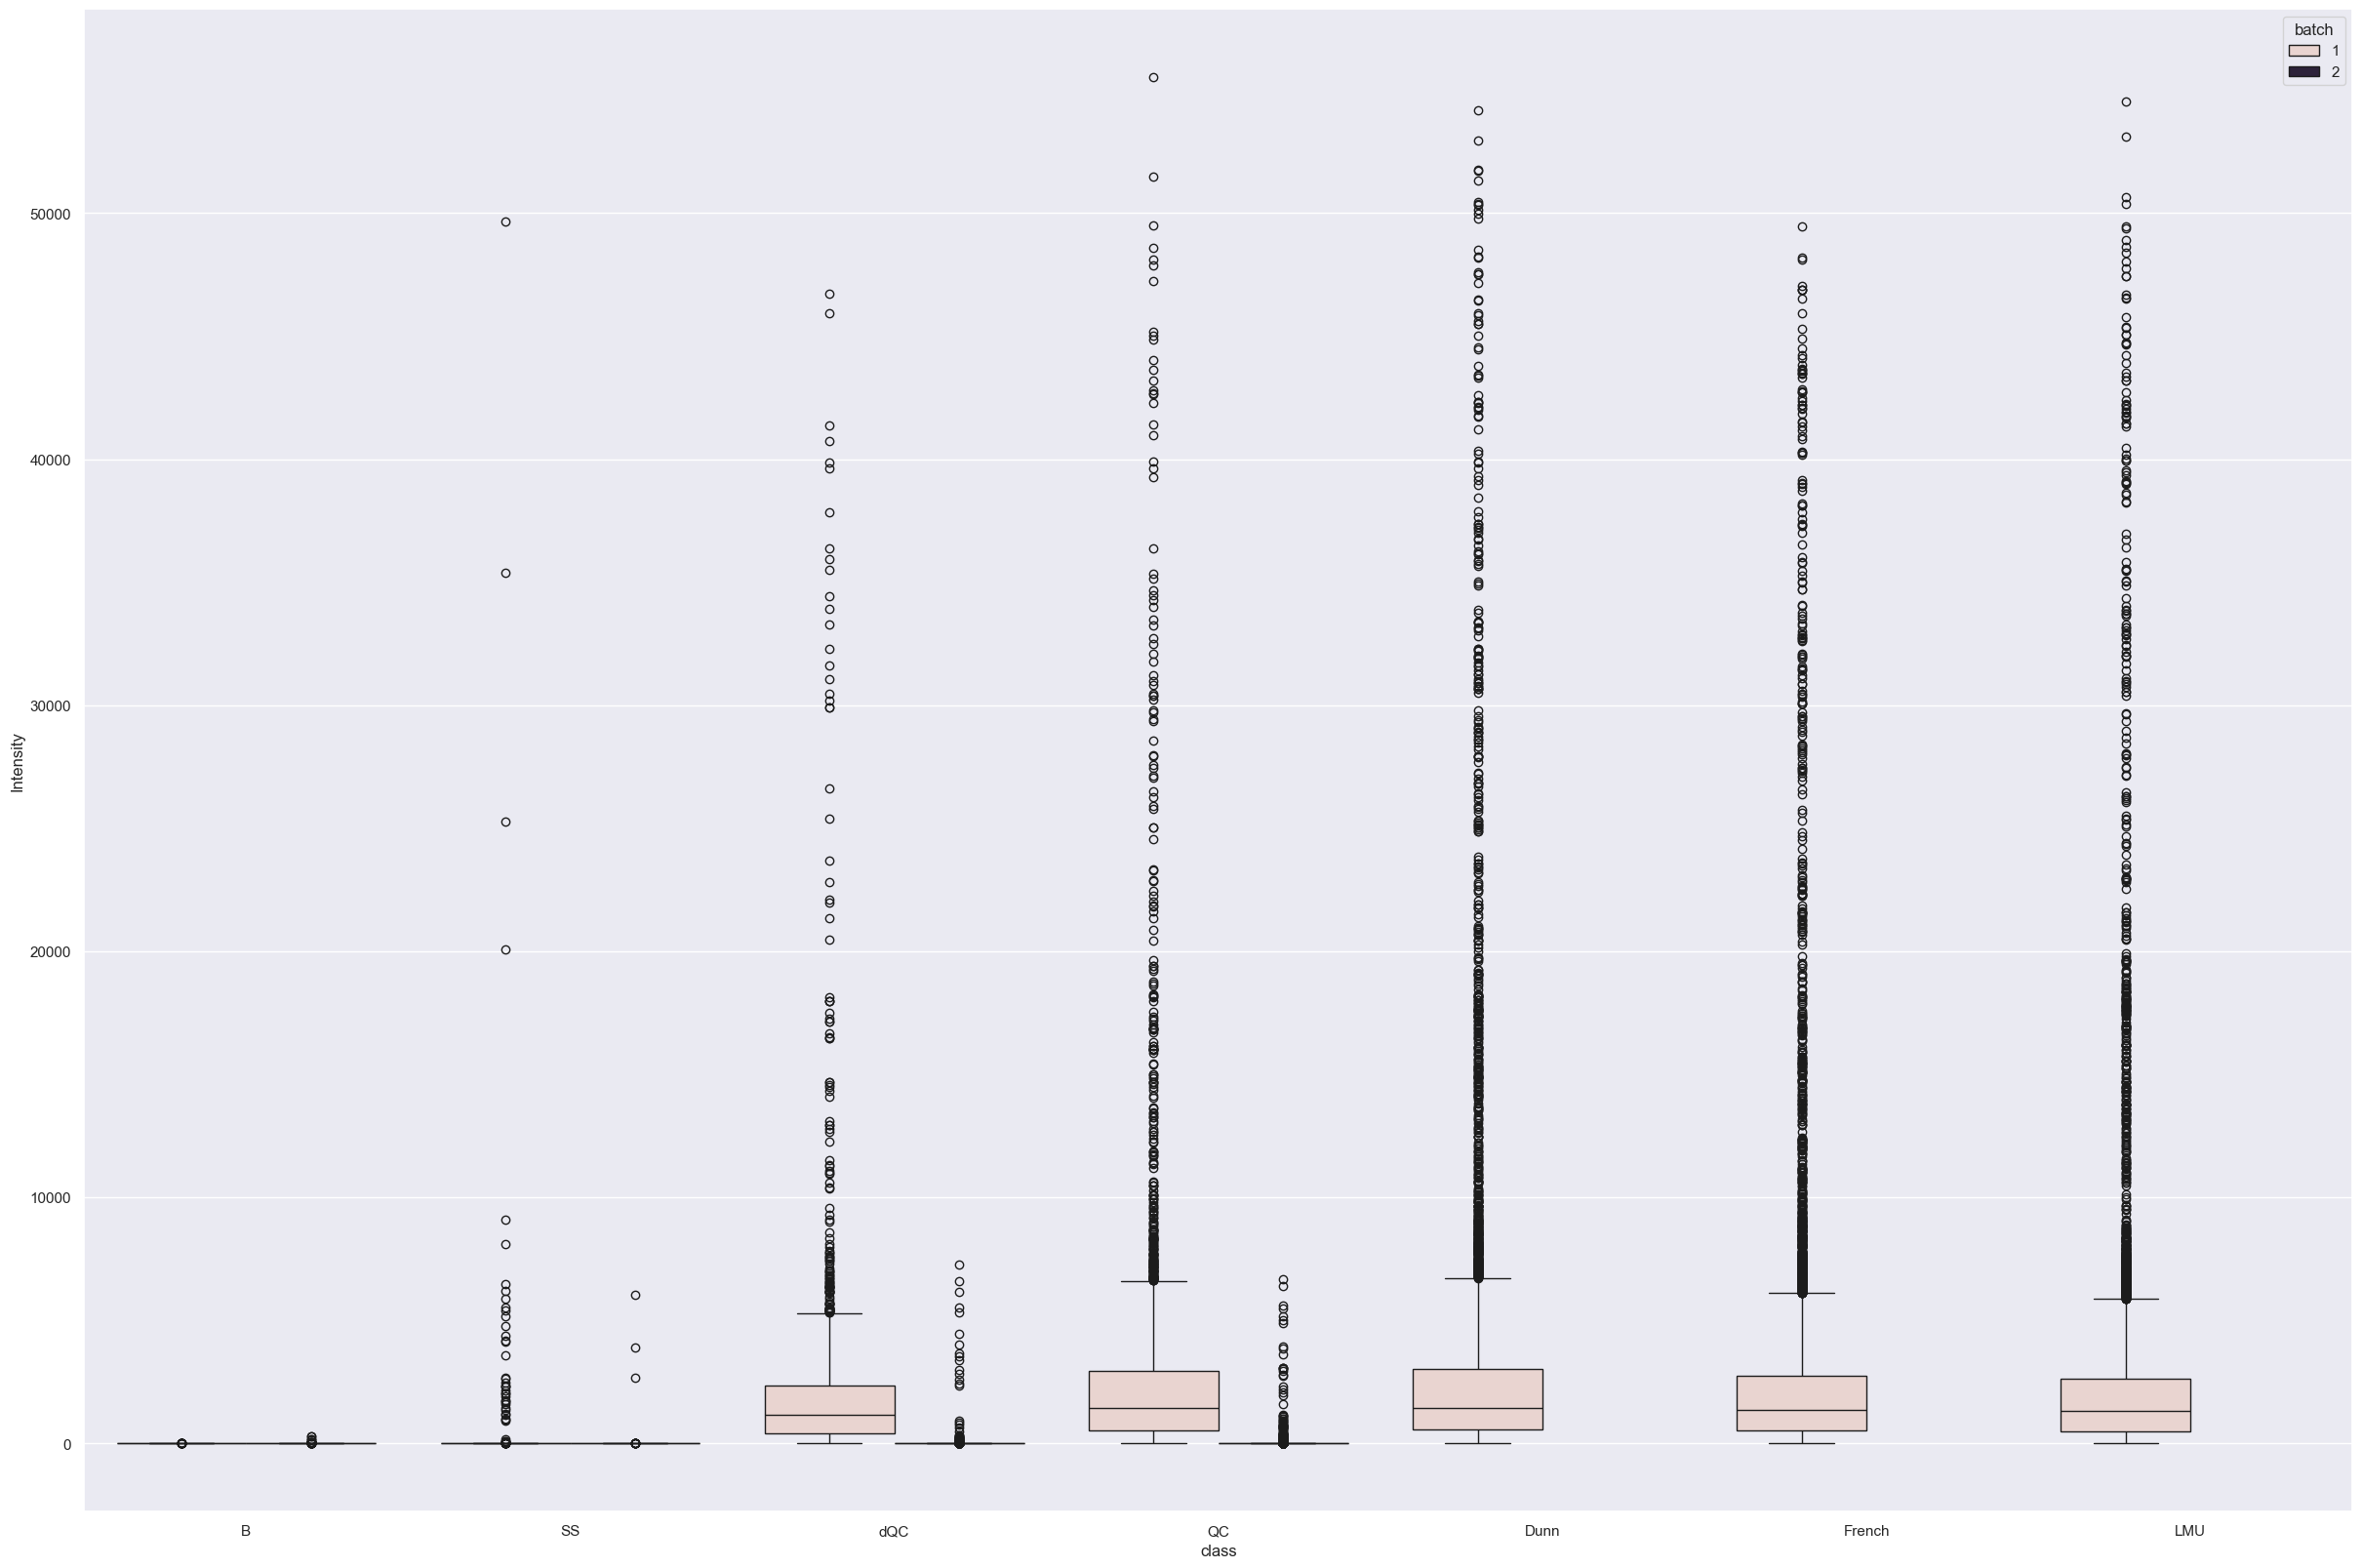

In [203]:
sns.boxplot(df_data_melt, x='class', y='Intensity', order=['B', 'SS', 'dQC', 'QC', 'Dunn', 'French', 'LMU'], hue='batch')

Features recorded intensities are 3 orders of magnitude lower between batch 1 and 2 for QC and dQC. It might be due to the fact that QC samples contain a different mix between batch 1 and batch 2. 

<Axes: xlabel='class', ylabel='intensity'>

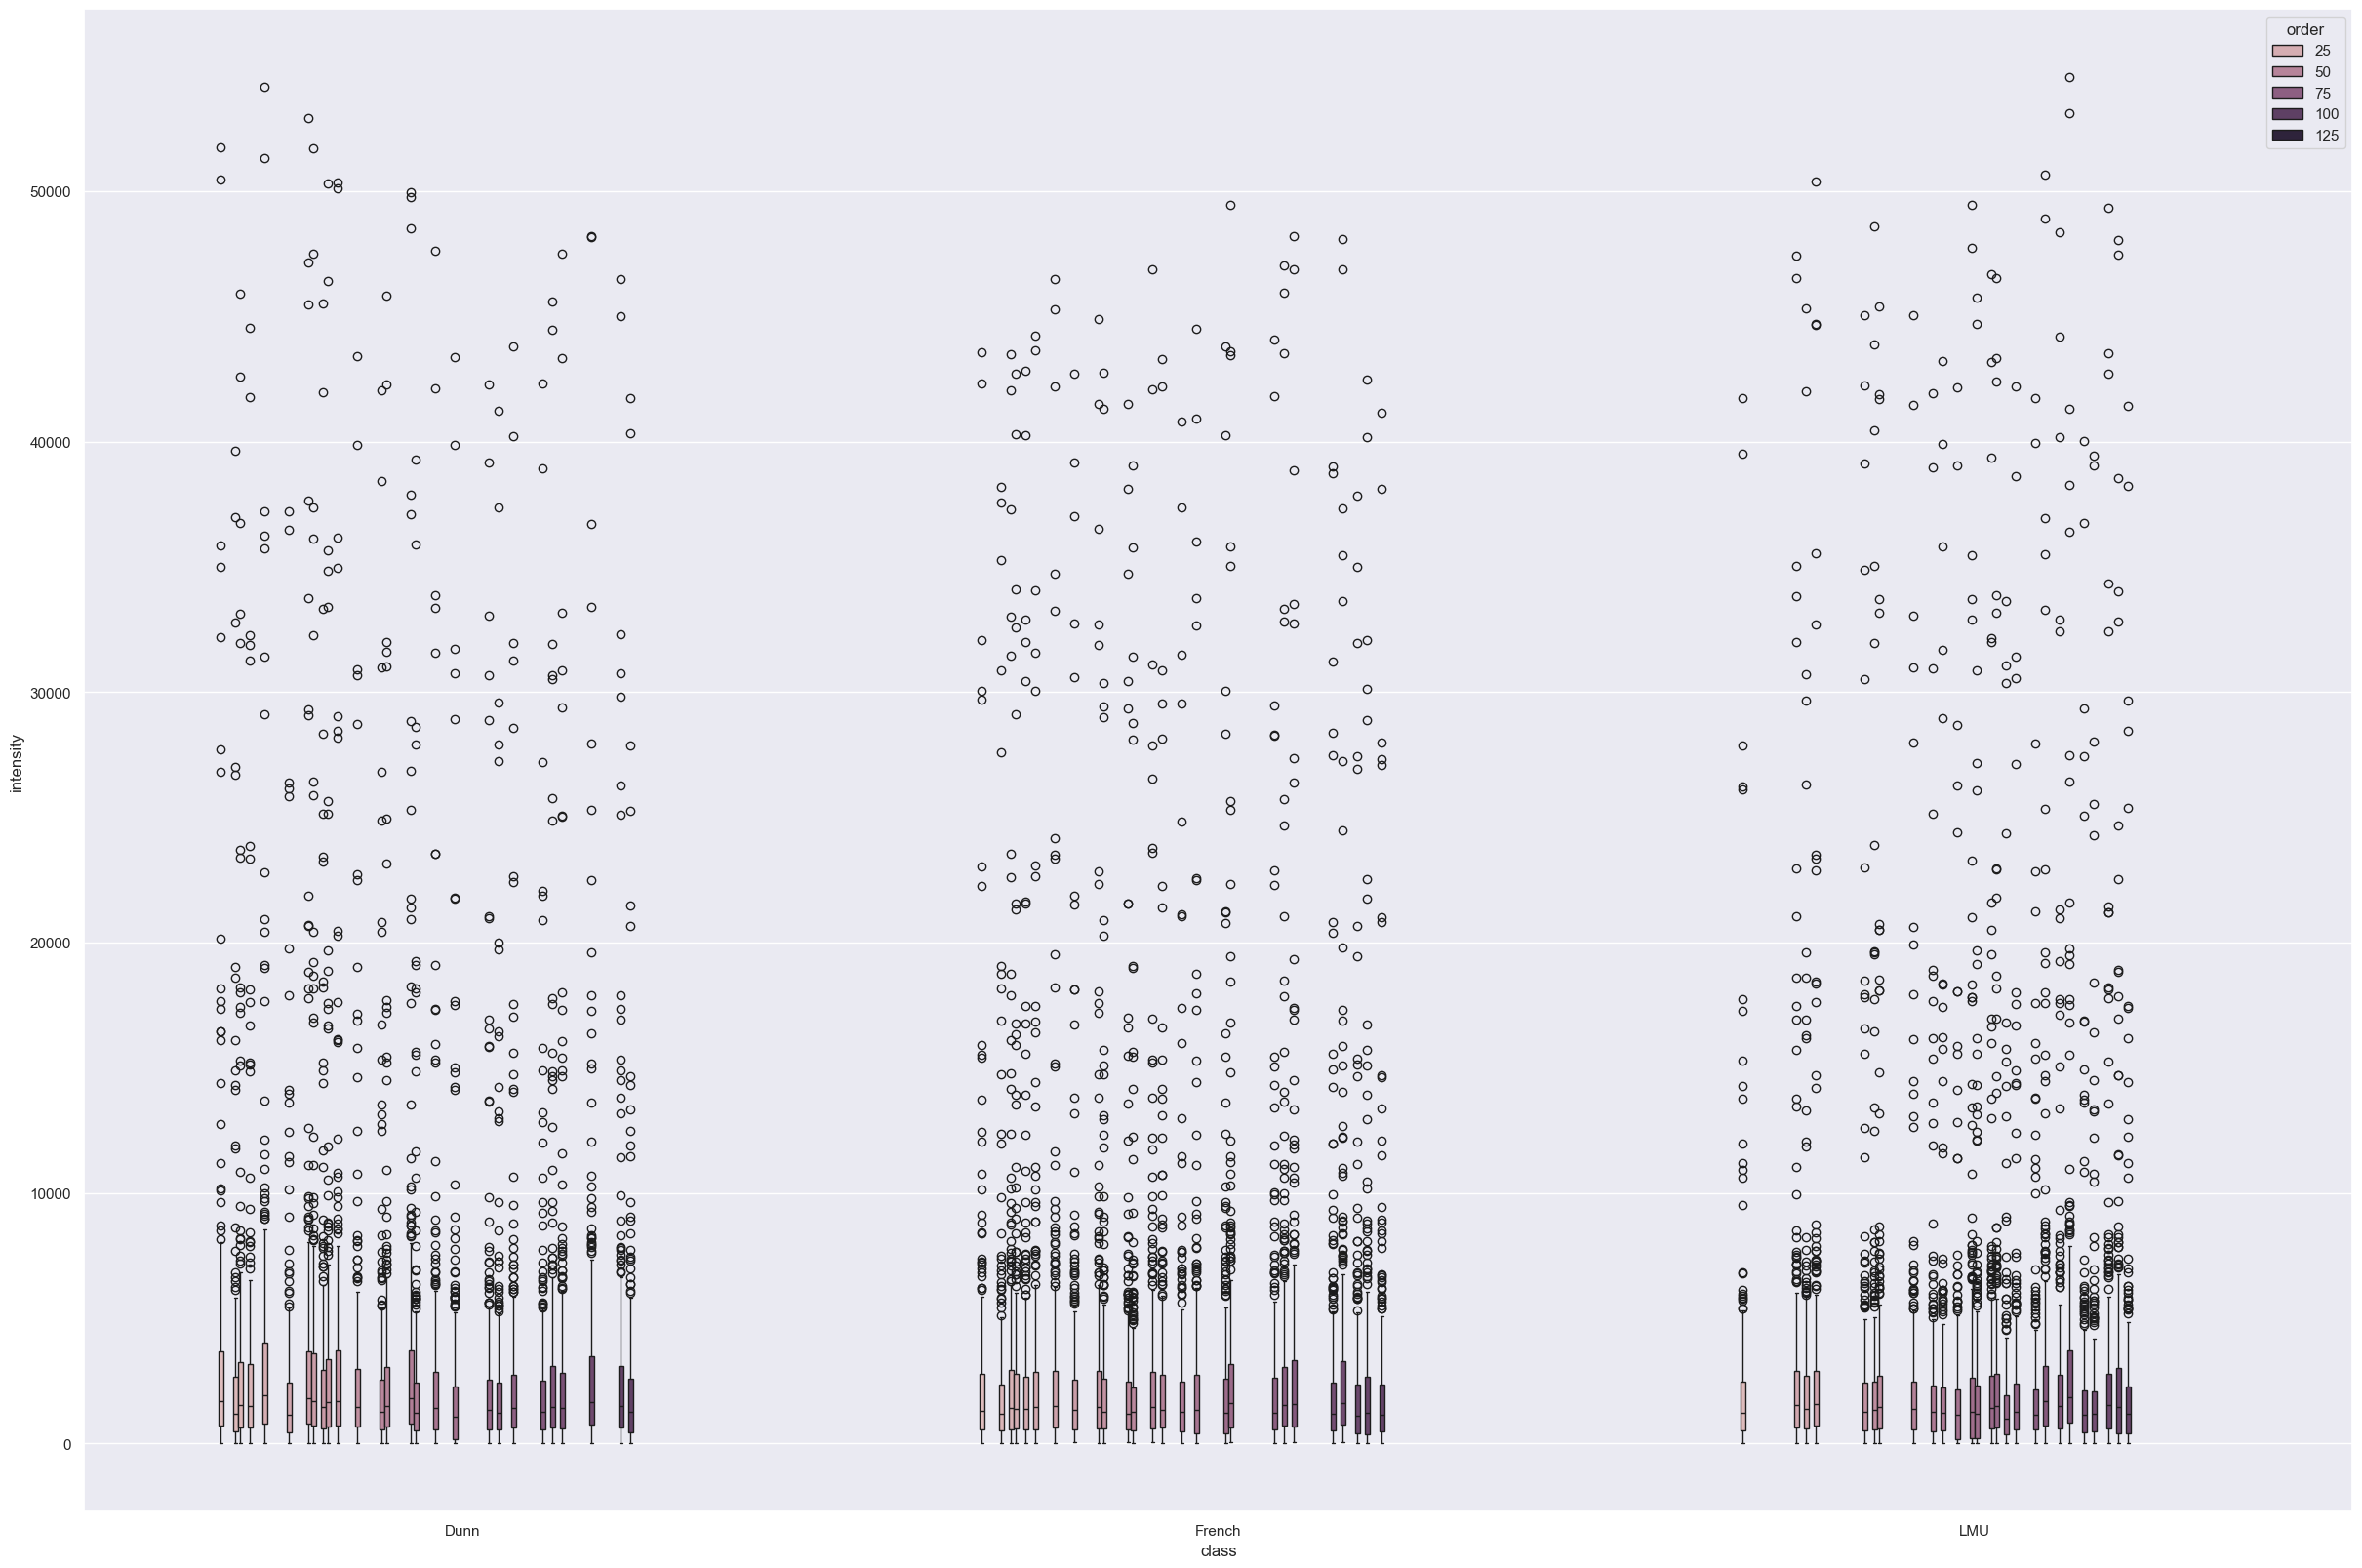

In [226]:
sns.boxplot(df_data_melt, x='class', y='intensity', order=['Dunn', 'French', 'LMU'], hue='order')

Is there a shift in recorded intensity across run order ?

In [270]:
from scipy.interpolate import interp1d
df_test = df_data_melt[(df_data_melt['feature_number'] == 100) & (df_data_melt['class'] == 'Dunn') & (df_data_melt['batch'] == 1)].sort_values(by='order')

spline = interp1d(df_test['order'], df_test['intensity'], kind='linear')

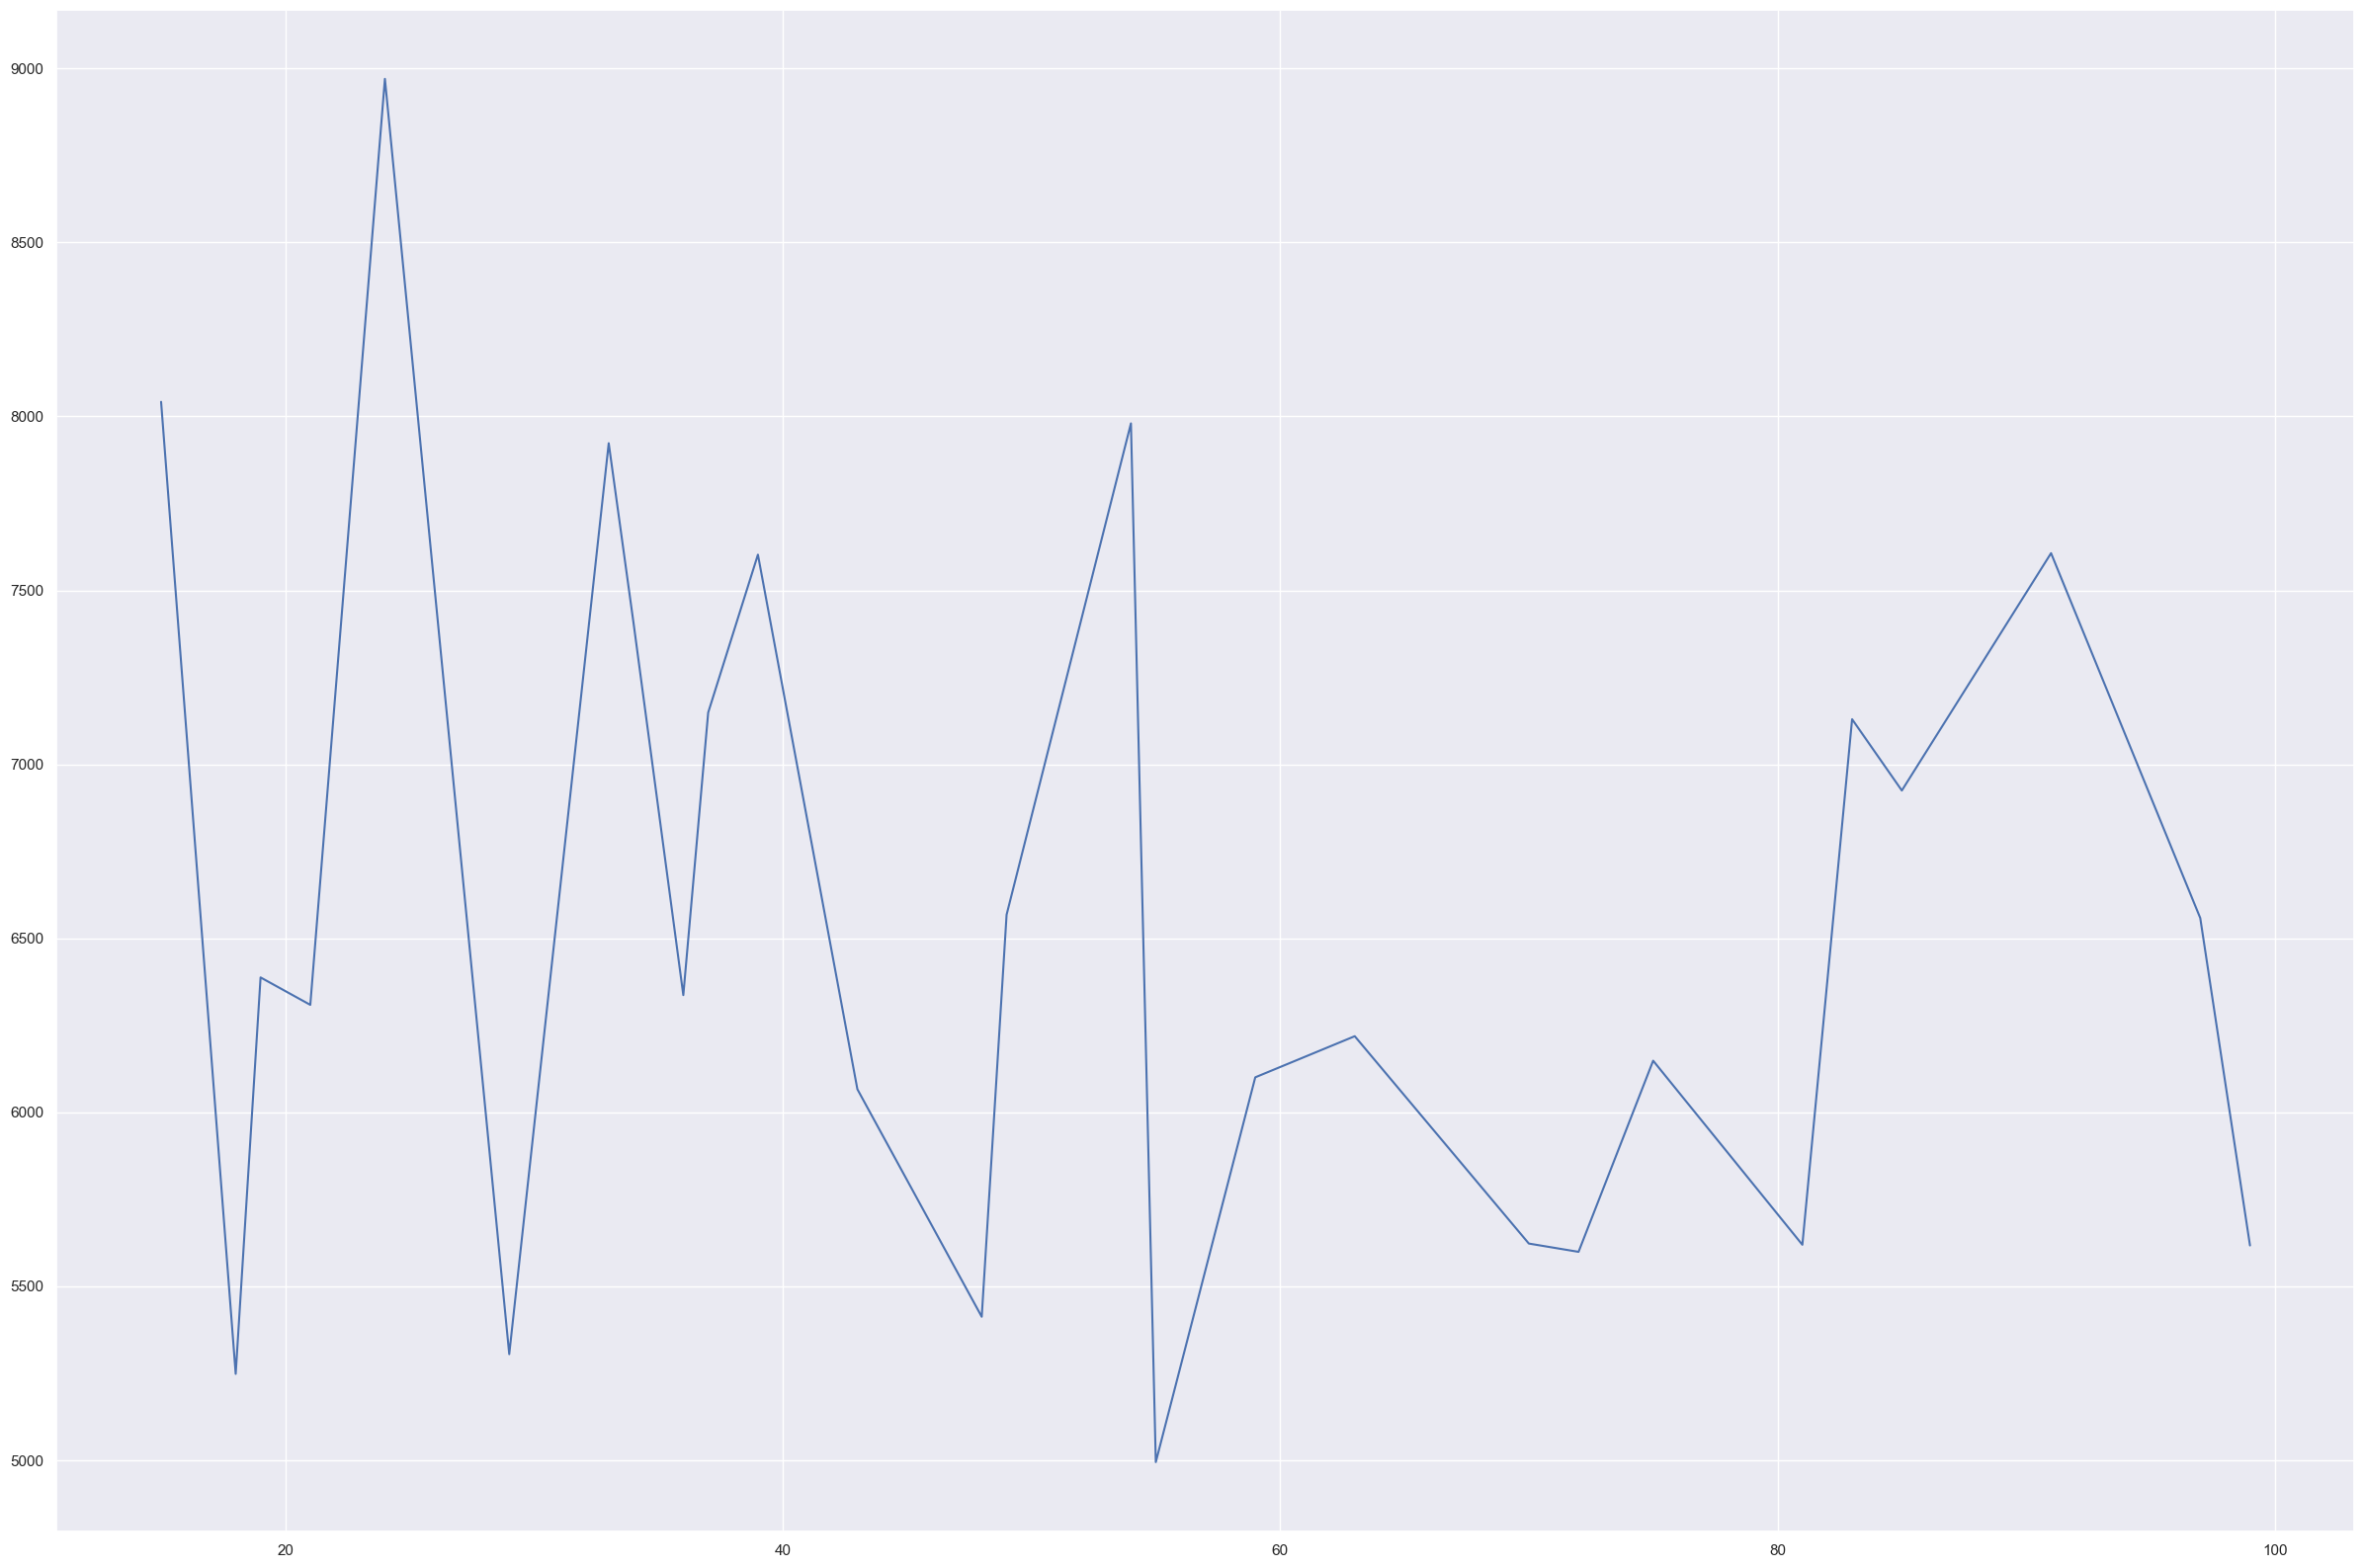

In [272]:
fig, ax = plt.subplots()
#ax.plot(df_test['order'], df_test['intensity'])
ax.plot(df_test['order'], spline(df_test['order']))

plt.show()

In [291]:
from statsmodels.formula.api import ols

df_test = df_data_melt[(df_data_melt['class'] == 'LMU') & (df_data_melt['batch'] == 1) & (df_data_melt['feature_number'] == 0) ]
model = ols(formula ='intensity ~ order', data = df_test)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              intensity   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     5.332
Date:                Wed, 08 Jan 2025   Prob (F-statistic):             0.0299
Time:                        16:59:50   Log-Likelihood:                -169.40
No. Observations:                  26   AIC:                             342.8
Df Residuals:                      24   BIC:                             345.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1319.2514    103.070     12.800      0.0

In [273]:
df_test = df_data_melt[(df_data_melt['class'] == 'dQC') & (df_data_melt['batch'] == 1)]
res = {'pvalue' : [], 'coef':[], 'feature':[]}
for i, group in df_test.groupby('feature'):

    model = OLS(group['order'], group['intensity'])


                                 OLS Regression Results                                
Dep. Variable:              intensity   R-squared (uncentered):                   0.201
Model:                            OLS   Adj. R-squared (uncentered):              0.200
Method:                 Least Squares   F-statistic:                              316.6
Date:                Wed, 08 Jan 2025   Prob (F-statistic):                    2.33e-63
Time:                        16:49:19   Log-Likelihood:                         -12592.
No. Observations:                1260   AIC:                                  2.519e+04
Df Residuals:                    1259   BIC:                                  2.519e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Recorded intensities for batch are much lower than for batch 1, in the case of QC and diluted QC. 

4.c - Run order effect on feature intensity

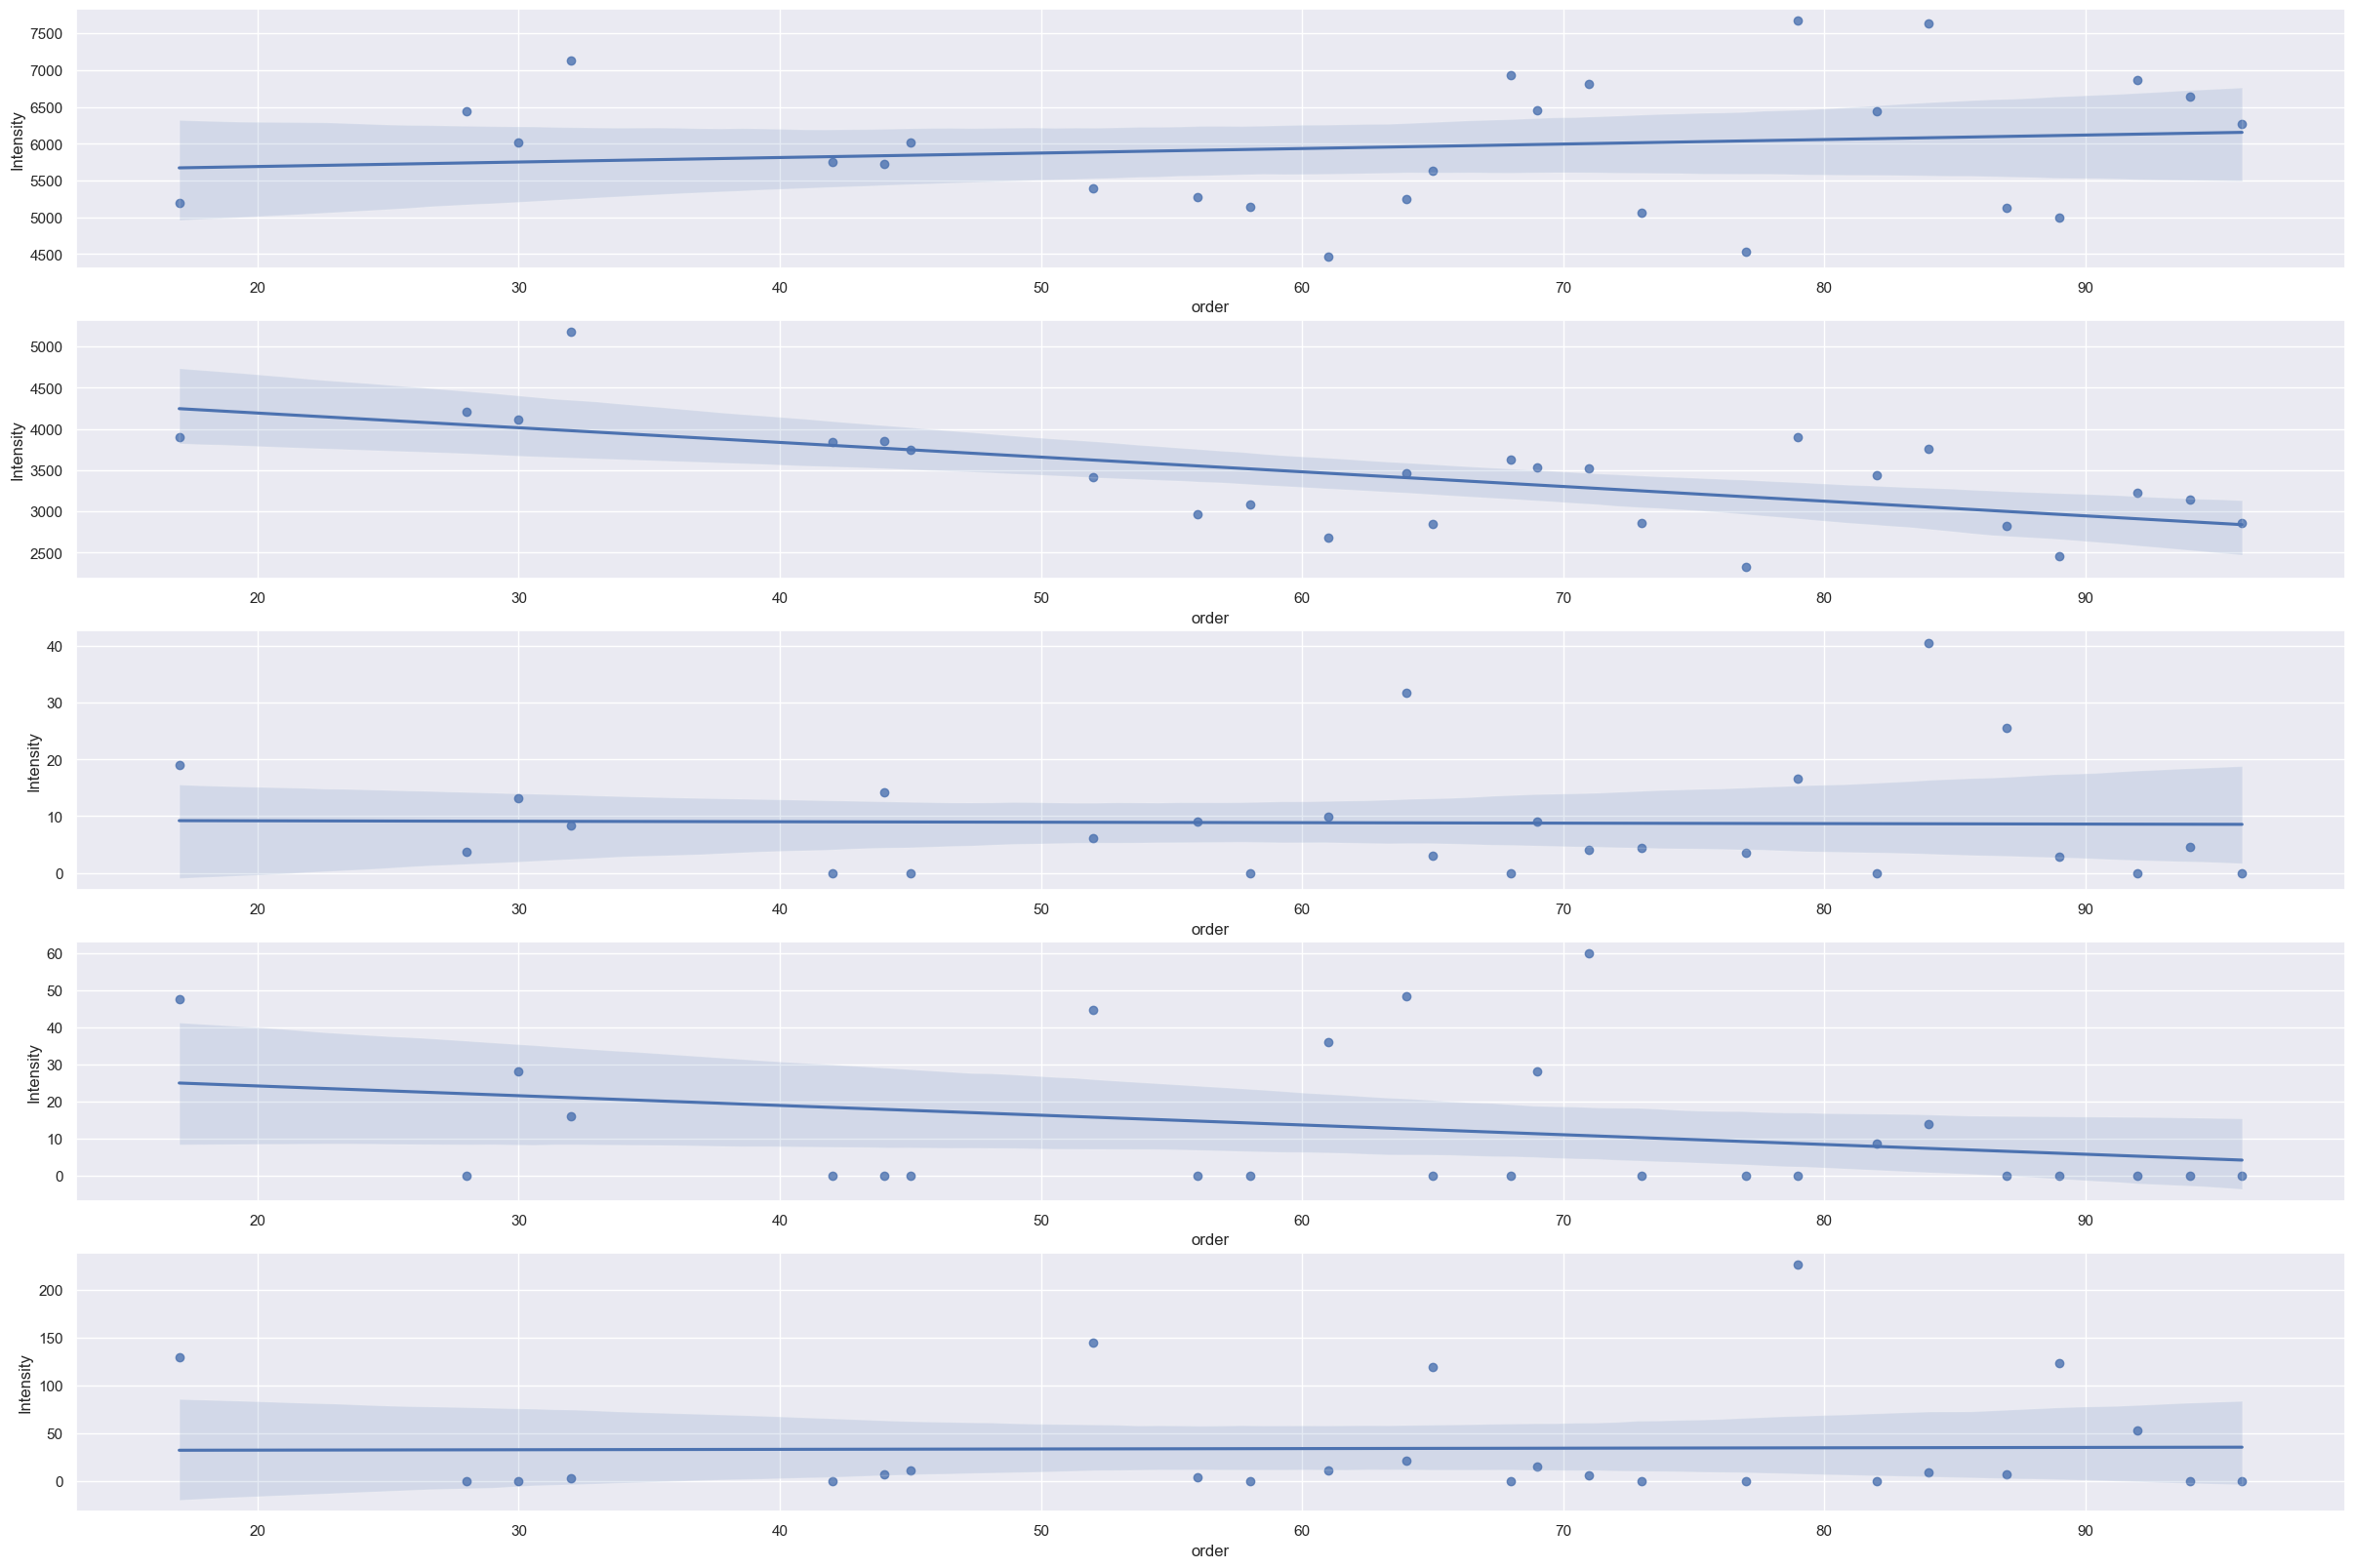

In [305]:
df_plot = df_data_melt[df_data_melt['class'].isin(['LMU']) & (170 <= df_data_melt['Feature number']) & ( df_data_melt['Feature number']<= 174  )]

fig, axs = plt.subplots(nrows=5)
for i in range(5):
    sns.regplot(x='order', y='Intensity', data=df_plot[df_plot['Feature number'] == 170 +i], ax=axs[i])


In [349]:
from statsmodels.formula.api import ols
df_res = df_data_melt[(df_data_melt['batch'] == 1) & (df_data_melt['class'].isin(['QC', 'Dunn']))]
df_res['class_type'] = df_res['class'].apply(lambda x : 1 if x == 'QC' else 0 )
res = ols(formula = 'intensity ~ order + feature_number + class_type', data = df_res).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              intensity   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     325.2
Date:                Wed, 08 Jan 2025   Prob (F-statistic):          4.20e-201
Time:                        19:20:23   Log-Likelihood:                -96456.
No. Observations:                9576   AIC:                         1.929e+05
Df Residuals:                    9572   BIC:                         1.929e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6618.0795    165.901     39.

C:\Users\Philippine\AppData\Local\Temp\ipykernel_15820\2985536962.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Differences between classes and QCs for batch 1 in terms of coefficient of variation

In [327]:
cv = df_data_melt[[ 'feature', 'intensity','class']][df_data_melt['batch'] == 1].groupby(['feature', 'class']).agg(lambda x : 0 if x.mean() <= 10E-3 else x.std() / x.mean() * 100).reset_index()\
                                            .rename(columns={'intensity' : 'CV%'})

In [367]:
test = st.ttest_ind(cv[cv['class'] == 'LMU']['CV%'], cv[cv['class'] == 'French']['CV%'])
print(test)

TtestResult(statistic=np.float64(3.4737166395117898), pvalue=np.float64(0.0005576995857258512), df=np.float64(502.0))


At the 5% confidence level, features CV in French samples are lower than for Dunn or LMU samples.

In [343]:
cv.groupby(['class']).describe()

CV%                                                        \
        count       mean        std       min        25%        50%   
class                                                                 
B       252.0  18.382747  62.482543  0.000000   0.000000   0.000000   
Dunn    252.0  26.790839  37.484970  8.335432  15.575460  18.573054   
French  252.0  21.004884  24.930356  6.864966  11.444922  14.172363   
LMU     252.0  31.161827  39.152705  9.471552  15.588569  18.243468   
QC      252.0  26.787619  26.191538  8.921597  16.238246  19.775228   
SS      188.0   0.000000   0.000000  0.000000   0.000000   0.000000   
dQC     252.0  31.961752  30.326404  2.530913  22.968140  26.533802   

                               
              75%         max  
class                          
B        0.000000  244.948974  
Dunn    25.127942  395.082716  
French  21.208359  224.004772  
LMU     27.472844  271.318297  
QC      29.194017  300.454960  
SS       0.000000    0.000000  
dQC     30.737873  219.891231

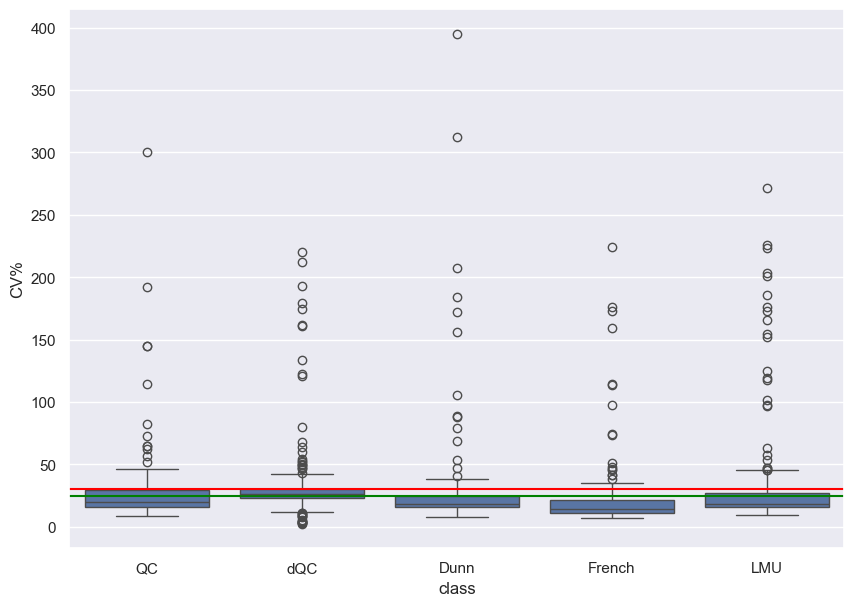

In [338]:
sns.set(rc = {'figure.figsize':(10, 7)})

fig = sns.boxplot(cv, x='class', y='CV%', order=['QC', 'dQC', 'Dunn', 'French', 'LMU'])
fig.axhline(30, color='red')

Comparing coefficients of variation for all features for all classes, we notice that blank and standard samples have the lowest CV for most of the features, because detected intensities are usually 0.

Samples from French class exhibit lower CV compared to Dunn or LMU, with LMU having

<Axes: xlabel='class', ylabel='intensity'>

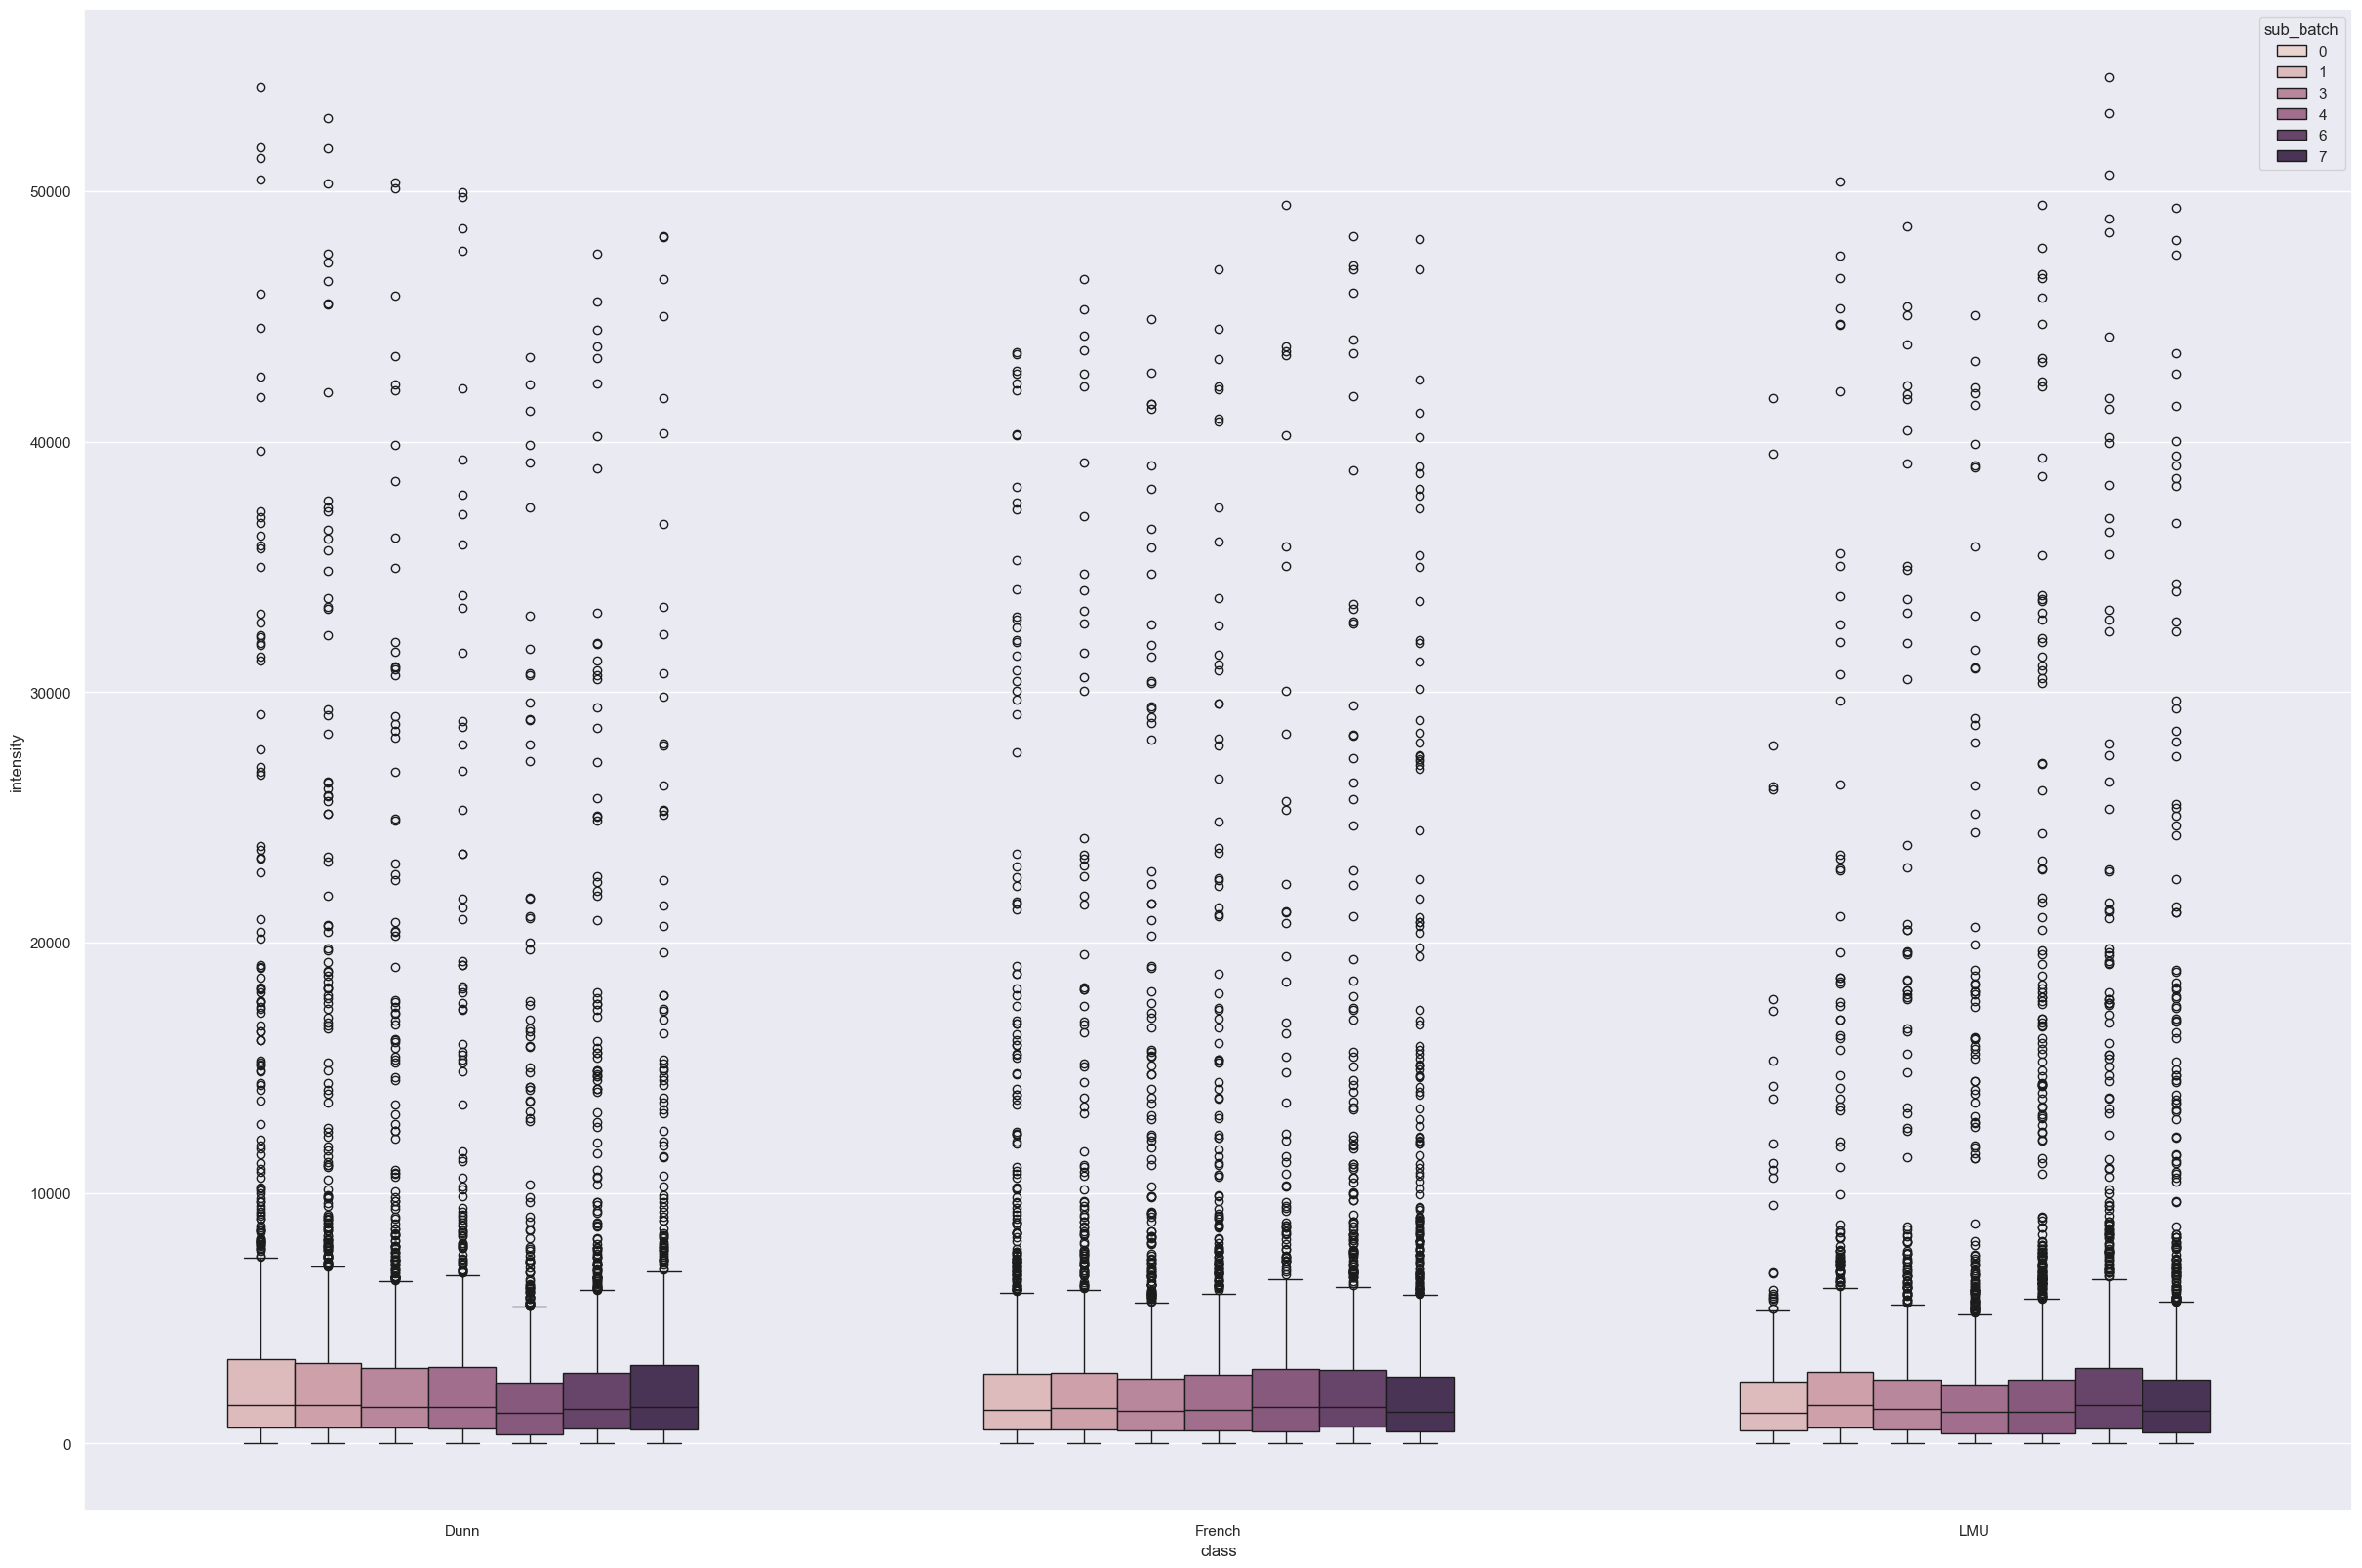

In [309]:
sns.boxplot(df_data_melt, x='class', y='intensity', order=['Dunn', 'French', 'LMU'], hue='sub_batch')

Removing highly correlated features (with thresh = 0.8) doesn't yield a significant feature reduction.

In [357]:
corr_mat = df_data.drop(columns=['sample', 'class', 'order', 'batch', 'sub_batch']).corr()

In [359]:
uncorr_columns = set()
cols = corr_mat.columns
thresh = 0.8
for i in range(corr_mat.shape[0]):
    for j in range(i+1, corr_mat.shape[0]):
        if corr_mat.iloc[i,j] < thresh:
            uncorr_columns.update({cols[j]})
print(len(uncorr_columns))

250


In [360]:
set(corr_mat.columns) - uncorr_columns

{'FT-000', 'FT-001'}

D-ratio

In [390]:
sample_classes = ['Dunn', 'French', 'LMU']
qc_classes = ['QC']

QC_std = df_data_melt[df_data_melt['class'].isin(qc_classes) & (df_data_melt['batch'] == 1)].groupby('feature').agg({'intensity':lambda x : x.std()}).rename(columns={'intensity' : 'std_QC'})
general_std = df_data_melt[df_data_melt['class'].isin(sample_classes)].groupby(['feature']).agg({'intensity':lambda x : x.std() }).rename(columns={'intensity' : 'std_sample'})

d_ratio = general_std.reset_index().merge(QC_std.reset_index(), on='feature', how='outer')
d_ratio['D_ratio'] = d_ratio.apply(lambda x : x.std_QC / (np.sqrt(x.std_QC**2 + x.std_sample**2)), axis=1)

In [391]:
d_ratio['std_ratio'] = d_ratio['std_sample'] / d_ratio['std_QC']
d_ratio

,feature,std_sample,std_QC,D_ratio,std_ratio
0,FT-000,162.739021,143.050123,0.660211,1.137636
1,FT-001,227.012638,201.691409,0.664184,1.125544
2,FT-002,435.184053,288.075434,0.551981,1.510660
3,FT-003,364.545076,343.031180,0.685290,1.062717
4,FT-004,1528.860709,1017.732248,0.554132,1.502223
...,...,...,...,...,...
247,FT-247,579.519945,619.019981,0.730014,0.936189
248,FT-248,171.726192,143.501786,0.641230,1.196683
249,FT-249,20.617525,17.358899,0.644066,1.187721
250,FT-250,208.250235,200.021502,0.692714,1.041139


In [386]:
d_ratio[d_ratio['D_ratio'] < 0.5].shape

(14, 5)

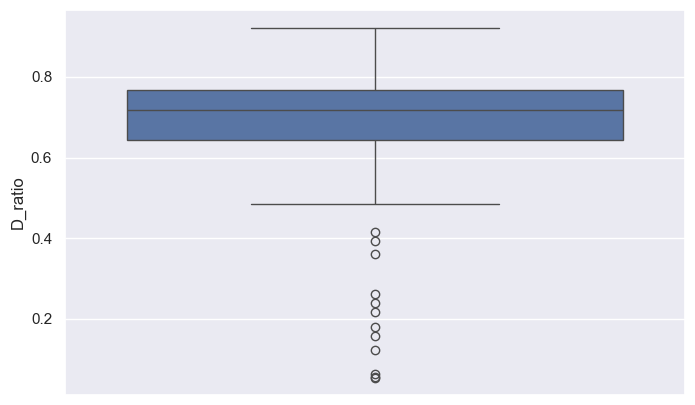

In [389]:
sns.set(rc = {'figure.figsize':(8, 5)})
sns.boxplot(d_ratio['D_ratio'])
#plt.xticks(rotation=90)
plt.show()

D-ratios for metabolites are for most of 50% cases above 0.5, which shows that technical variance accounts for most of the observed variance. Variation in QC measurements should be taken into account to correct intensity measurements in samples of interest.

## Batch effect correction